In [2]:
# Import Libraries untuk Analisis Prophet dengan Optimasi
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from itertools import product
import json

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

print("📊 Libraries berhasil dimuat!")
print("🎯 Notebook ini akan menampilkan analisis Prophet dengan MAPE yang sudah dioptimasi")

c:\laragon\bin\python\python-3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📊 Libraries berhasil dimuat!
🎯 Notebook ini akan menampilkan analisis Prophet dengan MAPE yang sudah dioptimasi


In [3]:
df = pd.read_excel("../data/data_kiriman.xlsx")
df.describe()

,SLA,Kantor_Kirim,Tgl_Kirim,Tgl_Antaran_Pertama,Tgl_Update,Berat,Cek
count,965003.000000,965003.000000,965003,965003,965003,965003.000000,965003.0
mean,2.281931,50826.053391,2023-02-25 02:27:21.960491008,2023-02-27 02:38:10.271844352,2023-02-27 03:56:00.154941440,0.569269,1.0
min,2.000000,10000.000000,2020-12-26 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,0.010000,1.0
25%,2.000000,40000.000000,2022-04-03 00:00:00,2022-04-05 00:00:00,2022-04-05 00:00:00,0.020000,1.0
50%,2.000000,61300.000000,2023-02-27 00:00:00,2023-02-28 00:00:00,2023-02-28 00:00:00,0.100000,1.0
75%,2.000000,65100.000000,2024-03-01 00:00:00,2024-03-03 00:00:00,2024-03-03 00:00:00,0.980000,1.0
max,6.000000,99900.000000,2024-12-29 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,10.000000,1.0
std,0.651119,22275.113908,NaN,NaN,NaN,1.061399,0.0


In [4]:
# display(df)
df.head(10)
# df.tail()

,Nosi,Posisi_Saat_Ini,Status Kiriman,Produk,SLA,Kantor_Kirim,Tgl_Kirim,Tgl_Antaran_Pertama,Tgl_Update,Petugas,Nama_Penerima,Alamat,Kota,Alasan_Gagal,Alasan_Irregulitas,Status_SWP,Berat,Cek
0,P2410070150487,KCU MALANG 65100,DELIVERED,PKH,5,75500,2021-10-07,2021-10-13,2021-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.G/2024,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
1,P2410070150380,KCU MALANG 65100,DELIVERED,PKH,5,75500,2022-10-07,2022-10-13,2022-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.BTH,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
2,P2410070151187,KCU MALANG 65100,DELIVERED,PKH,5,75500,2022-10-07,2022-10-13,2022-10-13,Moch. Nur Haqiqi,ARYA SJAHREZA -25/PDT.G/2024,JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
3,P2410070150487,KCU MALANG 65100,DELIVERED,PKH,5,75500,2022-10-07,2022-10-13,2022-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.G/2024,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
4,P2410070150487,KCU MALANG 65100,DELIVERED,PKH,5,75500,2023-10-07,2023-10-13,2023-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.G/2024,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
5,P2410070150380,KCU MALANG 65100,DELIVERED,PKH,5,75500,2023-10-07,2023-10-13,2023-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.BTH,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
6,P2410070151187,KCU MALANG 65100,DELIVERED,PKH,5,75500,2023-10-07,2023-10-13,2023-10-13,Moch. Nur Haqiqi,ARYA SJAHREZA -25/PDT.G/2024,JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
7,P2410070150380,KCU MALANG 65100,DELIVERED,PKH,5,75500,2024-10-07,2024-10-13,2024-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.BTH,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
8,P2410070150487,KCU MALANG 65100,DELIVERED,PKH,5,75500,2024-10-07,2024-10-13,2024-10-13,Moch. Nur Haqiqi,ARYA SYAHREZA -25/PDT.G/2024,JL BANDUNG RT 01,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1
9,P2410070151187,KCU MALANG 65100,DELIVERED,PKH,5,75500,2024-10-07,2024-10-13,2024-10-13,Moch. Nur Haqiqi,ARYA SJAHREZA -25/PDT.G/2024,JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN,"KOTA MALANG, KLOJEN",-,Tanpa Manifest,oversla,0.1,1


In [6]:
df = df[['Kota', 'Cek', 'Tgl_Kirim']]
# display(df)
df.head(10)

,Kota,Cek,Tgl_Kirim
0,"KOTA MALANG, KLOJEN",1,2021-10-07
1,"KOTA MALANG, KLOJEN",1,2022-10-07
2,"KOTA MALANG, KLOJEN",1,2022-10-07
3,"KOTA MALANG, KLOJEN",1,2022-10-07
4,"KOTA MALANG, KLOJEN",1,2023-10-07
5,"KOTA MALANG, KLOJEN",1,2023-10-07
6,"KOTA MALANG, KLOJEN",1,2023-10-07
7,"KOTA MALANG, KLOJEN",1,2024-10-07
8,"KOTA MALANG, KLOJEN",1,2024-10-07
9,"KOTA MALANG, KLOJEN",1,2024-10-07


In [7]:
df['Kecamatan'] = df['Kota'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else '')
display(df)

,Kota,Cek,Tgl_Kirim,Kecamatan
0,"KOTA MALANG, KLOJEN",1,2021-10-07,KLOJEN
1,"KOTA MALANG, KLOJEN",1,2022-10-07,KLOJEN
2,"KOTA MALANG, KLOJEN",1,2022-10-07,KLOJEN
3,"KOTA MALANG, KLOJEN",1,2022-10-07,KLOJEN
4,"KOTA MALANG, KLOJEN",1,2023-10-07,KLOJEN
...,...,...,...,...
964998,"KOTA MALANG, LOWOKWARU",1,2024-12-01,LOWOKWARU
964999,"KOTA MALANG, BLIMBING",1,2024-12-01,BLIMBING
965000,"KOTA MALANG, KEDUNGKANDANG",1,2024-12-01,KEDUNGKANDANG
965001,"KOTA MALANG, KLOJEN",1,2024-12-01,KLOJEN


In [8]:
df = df[['Kecamatan', 'Cek', 'Tgl_Kirim']]
display(df)

,Kecamatan,Cek,Tgl_Kirim
0,KLOJEN,1,2021-10-07
1,KLOJEN,1,2022-10-07
2,KLOJEN,1,2022-10-07
3,KLOJEN,1,2022-10-07
4,KLOJEN,1,2023-10-07
...,...,...,...
964998,LOWOKWARU,1,2024-12-01
964999,BLIMBING,1,2024-12-01
965000,KEDUNGKANDANG,1,2024-12-01
965001,KLOJEN,1,2024-12-01


In [9]:
df_kecamatan_weekly = df.groupby('Kecamatan').resample('W', on='Tgl_Kirim')['Cek'].count().reset_index()
df_kecamatan_weekly.rename(columns={'Cek': 'total paket'}, inplace=True)
display(df_kecamatan_weekly)

,Kecamatan,Tgl_Kirim,total paket
0,BLIMBING,2020-12-27,7
1,BLIMBING,2021-01-03,217
2,BLIMBING,2021-01-10,518
3,BLIMBING,2021-01-17,432
4,BLIMBING,2021-01-24,446
...,...,...,...
1045,SUKUN,2024-12-01,584
1046,SUKUN,2024-12-08,764
1047,SUKUN,2024-12-15,798
1048,SUKUN,2024-12-22,804


In [11]:
df_kecamatan_weekly['minggu_ke'] = df_kecamatan_weekly['Tgl_Kirim'].dt.isocalendar().week.astype(int)
display(df_kecamatan_weekly)

,Kecamatan,Tgl_Kirim,total paket,minggu_ke
0,BLIMBING,2020-12-27,7,52
1,BLIMBING,2021-01-03,217,53
2,BLIMBING,2021-01-10,518,1
3,BLIMBING,2021-01-17,432,2
4,BLIMBING,2021-01-24,446,3
...,...,...,...,...
1045,SUKUN,2024-12-01,584,48
1046,SUKUN,2024-12-08,764,49
1047,SUKUN,2024-12-15,798,50
1048,SUKUN,2024-12-22,804,51


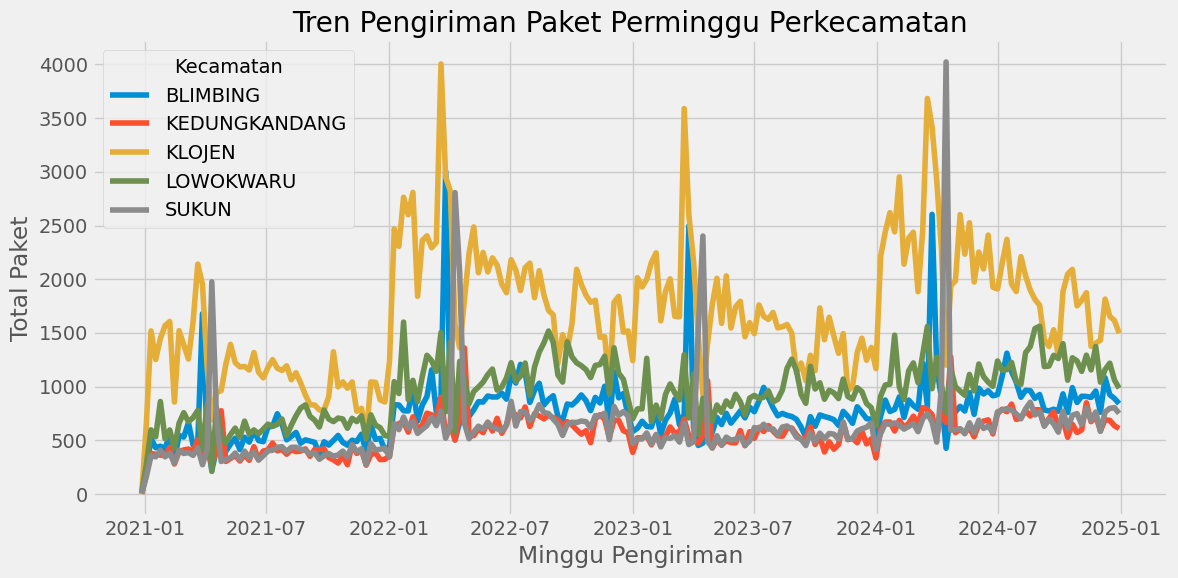

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kecamatan_weekly, x='Tgl_Kirim', y='total paket', hue='Kecamatan')
plt.title('Tren Pengiriman Paket Perminggu Perkecamatan')
plt.xlabel('Minggu Pengiriman')
plt.ylabel('Total Paket')
plt.legend(title='Kecamatan')
plt.grid(True)
plt.tight_layout()
plt.show()

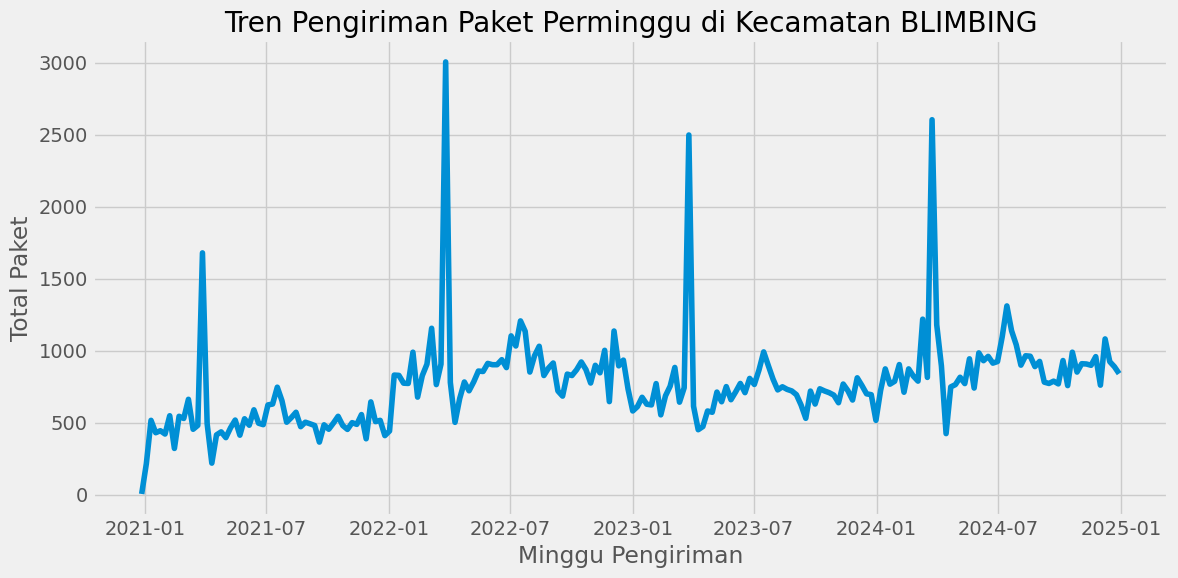

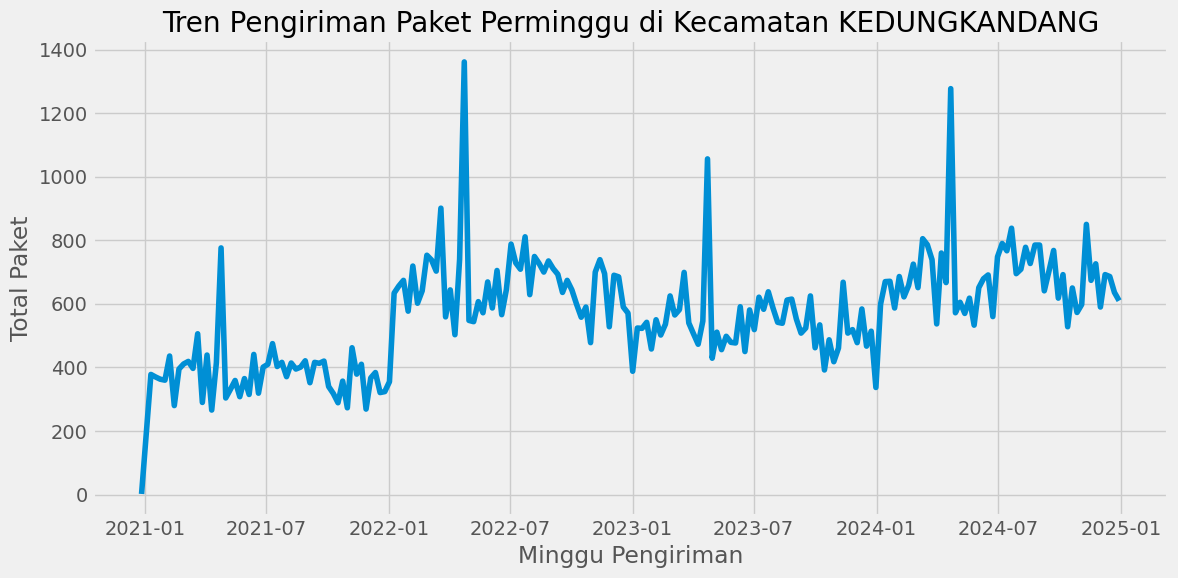

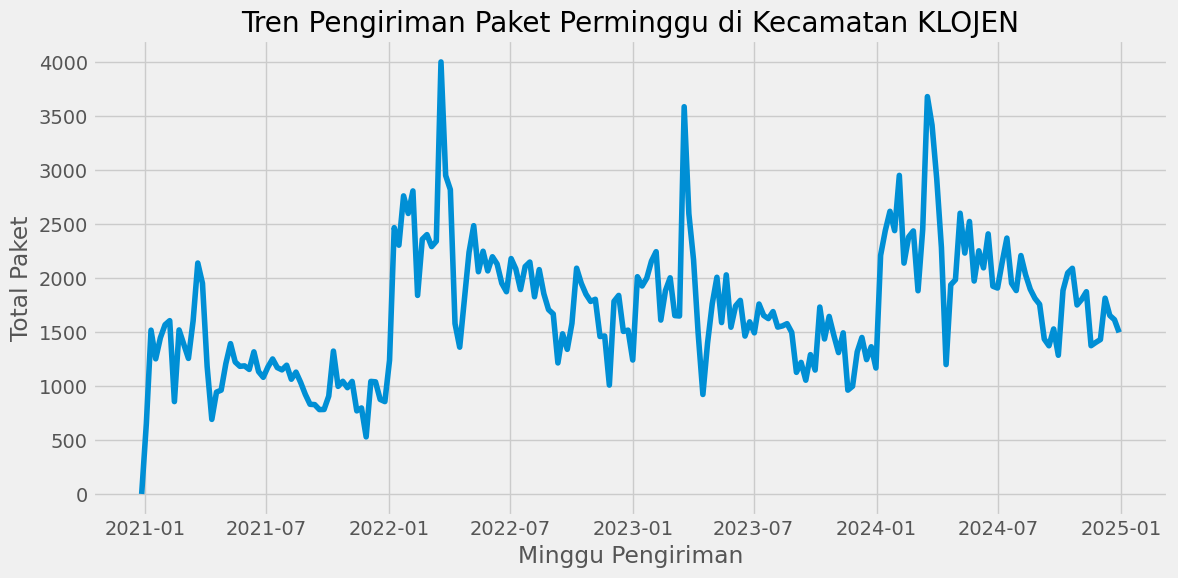

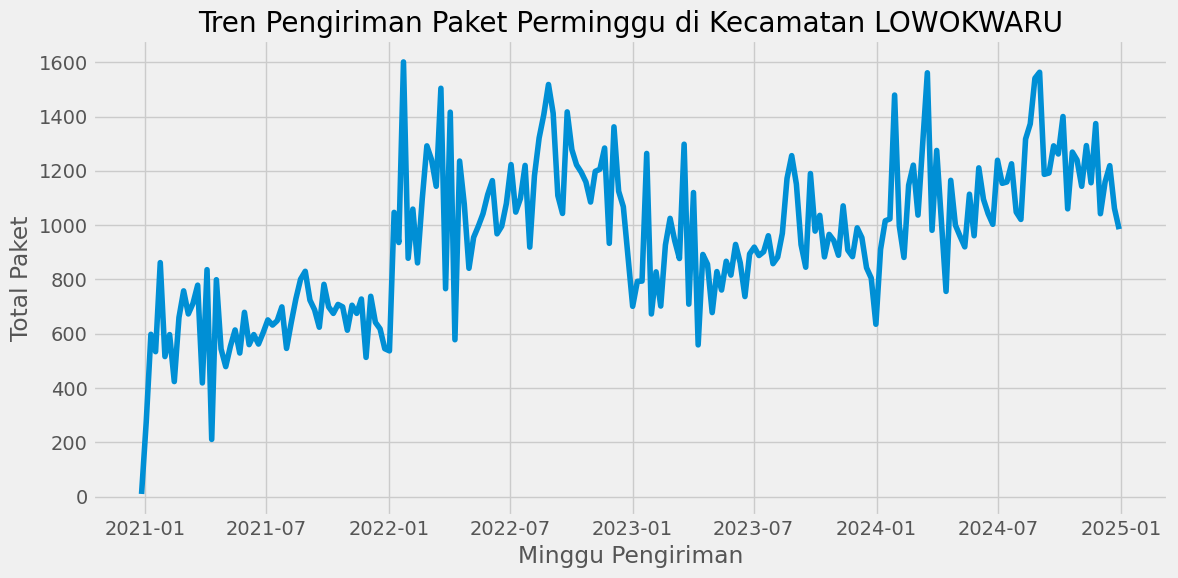

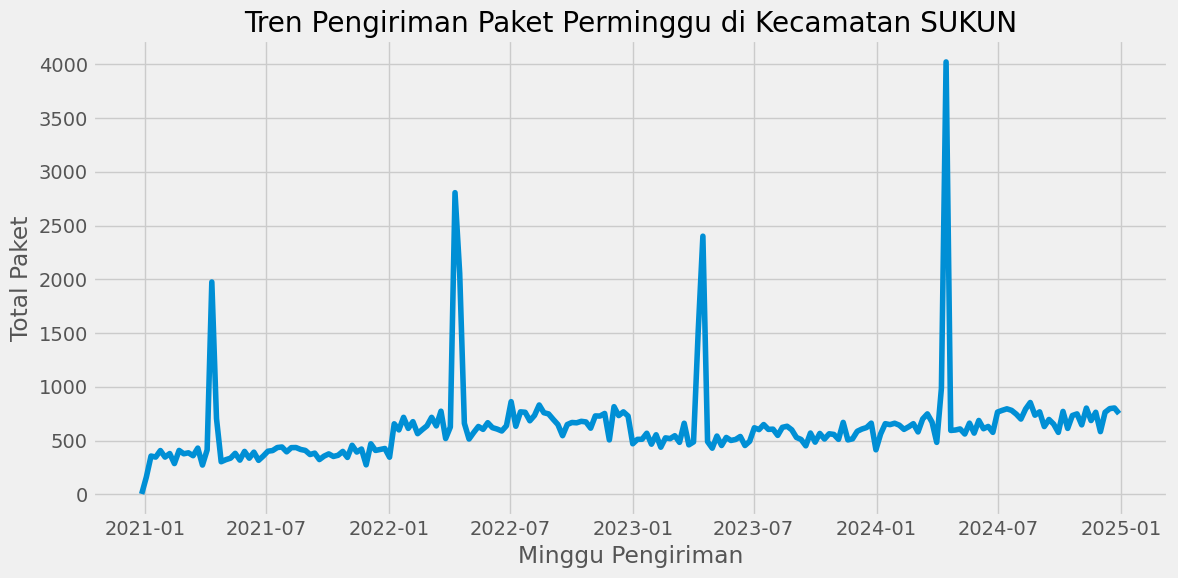

In [13]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    df_filtered = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_filtered, x='Tgl_Kirim', y='total paket')
    plt.title(f'Tren Pengiriman Paket Perminggu di Kecamatan {kecamatan}')
    plt.xlabel('Minggu Pengiriman')
    plt.ylabel('Total Paket')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

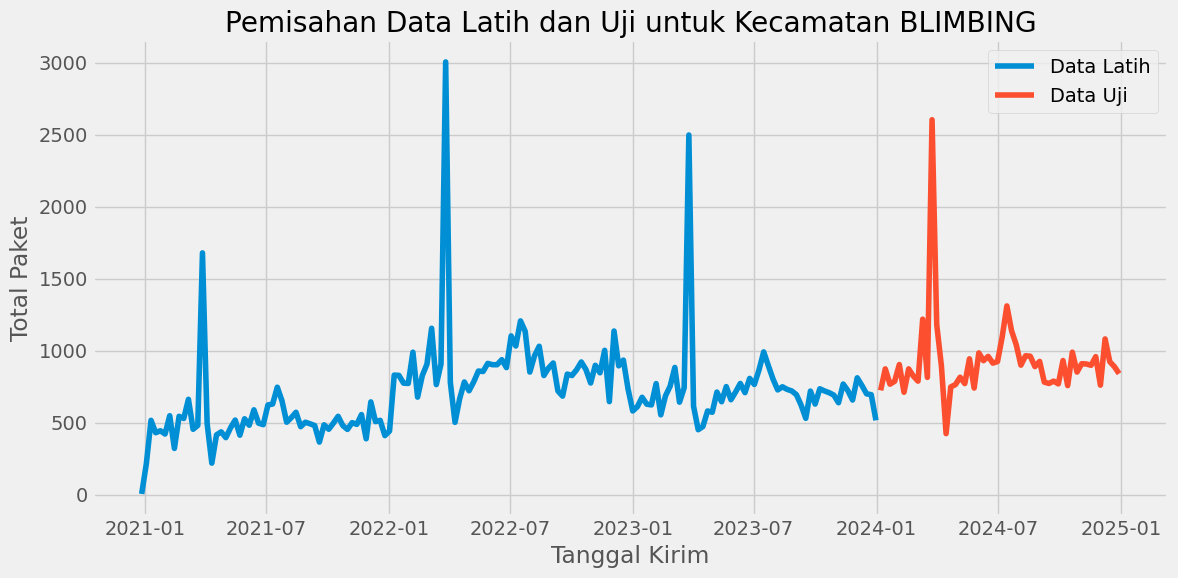

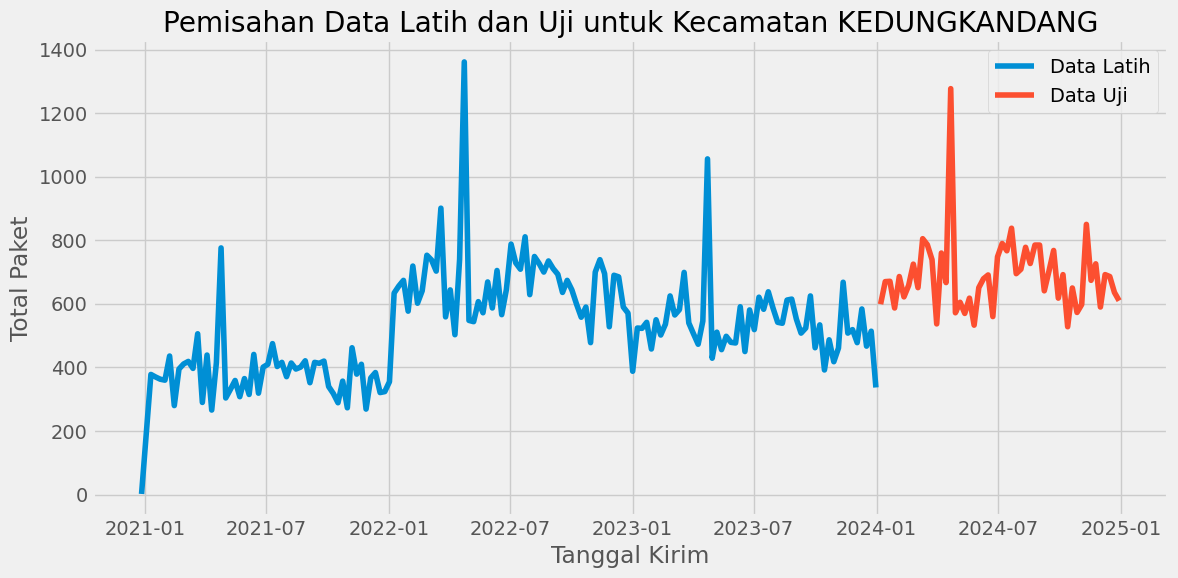

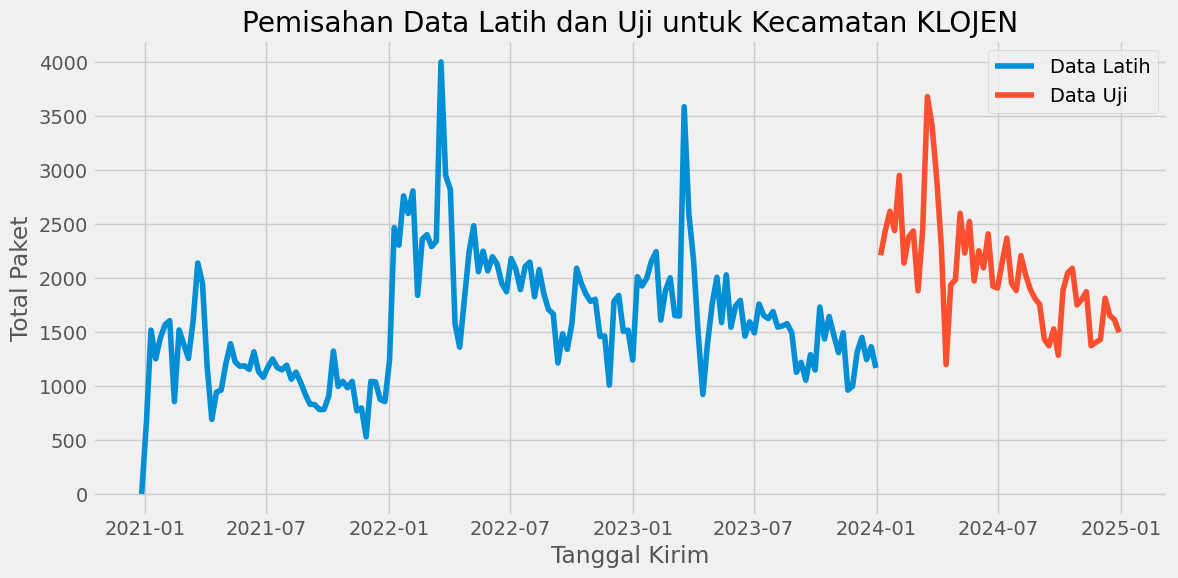

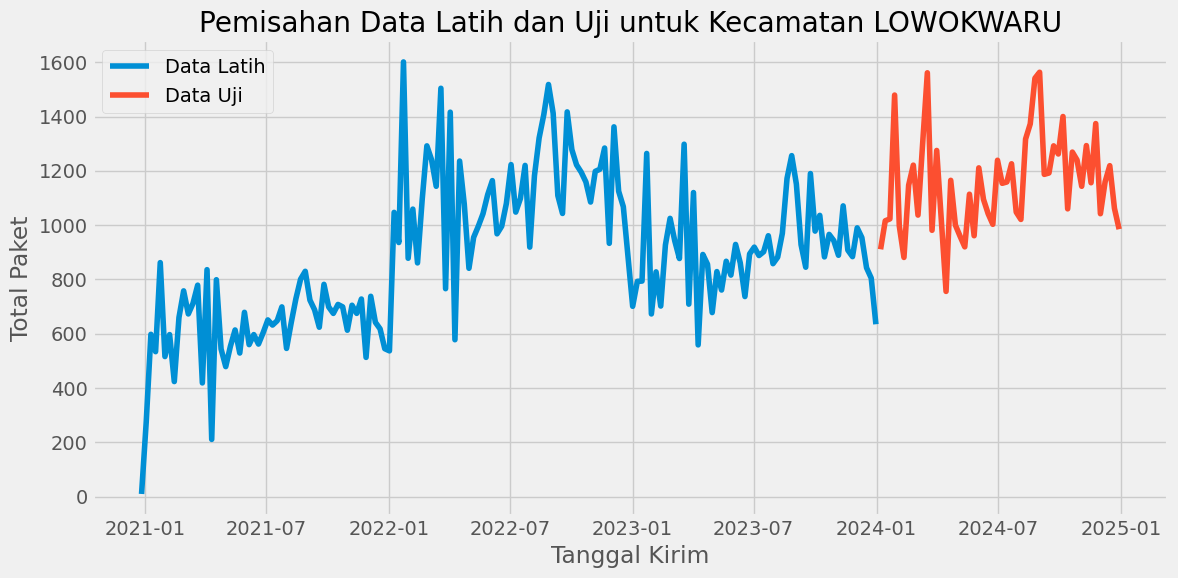

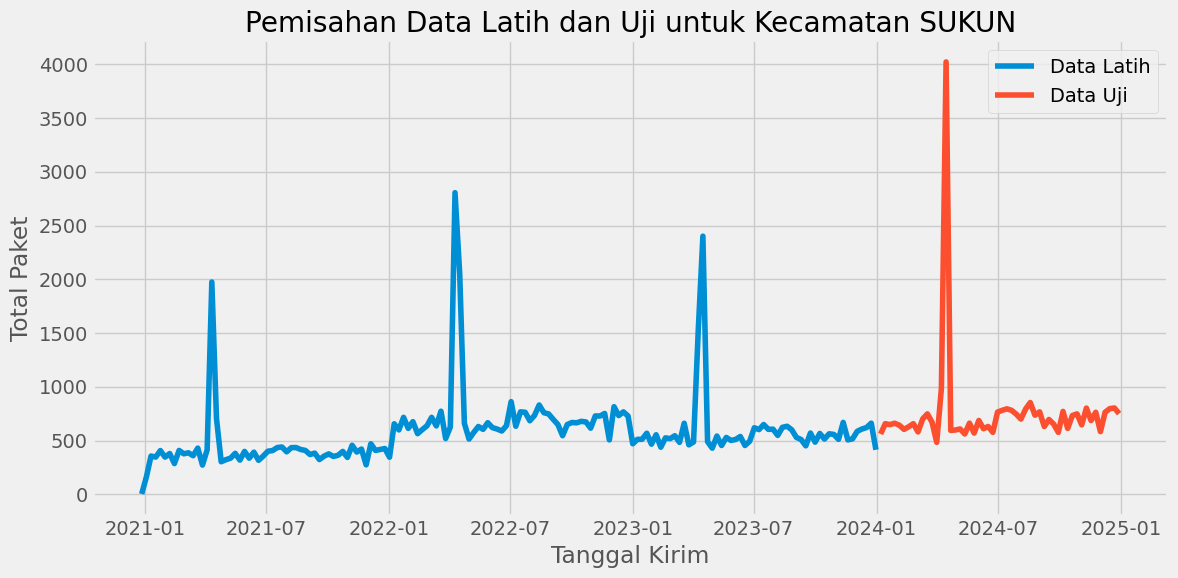

In [14]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    # Filter data untuk kecamatan saat ini
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    # Hitung titik pemisahan untuk kecamatan saat ini (52 minggu terakhir untuk data test)
    split_point_kecamatan = len(df_filtered_kecamatan) - 52

    # Pisahkan data menjadi train dan test untuk kecamatan saat ini
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan]
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Latih')
    sns.lineplot(data=test_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Uji')
    plt.title(f'Pemisahan Data Latih dan Uji untuk Kecamatan {kecamatan}')
    plt.xlabel('Tanggal Kirim')
    plt.ylabel('Total Paket')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [19]:
# Grid Search untuk Optimasi Hyperparameter Prophet
print("🔍 Memulai Grid Search untuk Optimasi Hyperparameter Prophet...")
print("⏱️  Proses ini membutuhkan waktu 1-2 jam, harap tunggu...\n")

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [25, 50, 100]
}

# Dictionary untuk menyimpan hasil optimasi
optimization_results = {}

# Buat holidays untuk Indonesia
holidays = make_holidays_df(
    year_list=[2021, 2022, 2023, 2024, 2025],
    country='ID'
)

for kecamatan in unique_kecamatan:
    print(f"\n{'='*70}")
    print(f"🎯 Optimasi untuk Kecamatan: {kecamatan}")
    print(f"{'='*70}")
    
    # Filter dan split data
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan].copy()
    split_point_kecamatan = len(df_filtered_kecamatan) - 52
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan].copy()
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:].copy()
    
    # Prepare data untuk Prophet
    train_prophet = train_kecamatan[['Tgl_Kirim', 'total paket']].copy()
    train_prophet.columns = ['ds', 'y']
    
    best_mape = float('inf')
    best_params = None
    best_metrics = None
    
    # Generate semua kombinasi parameter
    all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]
    total_combinations = len(all_params)
    
    print(f"📊 Total kombinasi parameter: {total_combinations}")
    print(f"🚀 Memulai evaluasi...\n")
    
    for idx, params in enumerate(all_params, 1):
        try:
            # Inisialisasi model dengan parameter saat ini
            model = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                holidays=holidays,
                changepoint_prior_scale=params['changepoint_prior_scale'],
                seasonality_prior_scale=params['seasonality_prior_scale'],
                seasonality_mode=params['seasonality_mode'],
                n_changepoints=params['n_changepoints']
            )
            
            # Training
            model.fit(train_prophet)
            
            # Prediksi
            future = model.make_future_dataframe(periods=52, freq='W')
            forecast = model.predict(future)
            test_predictions = forecast.tail(52)
            
            # Evaluasi
            y_true = test_kecamatan['total paket'].values
            y_pred = test_predictions['yhat'].values
            
            mape = mean_absolute_percentage_error(y_true, y_pred) * 100
            mae = mean_absolute_error(y_true, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            
            # Update best params jika lebih baik
            if mape < best_mape:
                best_mape = mape
                best_params = params.copy()
                best_metrics = {
                    'MAPE': mape,
                    'MAE': mae,
                    'RMSE': rmse
                }
                print(f"✨ [{idx}/{total_combinations}] New Best MAPE: {mape:.2f}% - Params: {params}")
            
            # Progress setiap 20 iterasi
            if idx % 20 == 0:
                print(f"⏳ Progress: {idx}/{total_combinations} ({idx/total_combinations*100:.1f}%) - Current Best MAPE: {best_mape:.2f}%")
                
        except Exception as e:
            print(f"❌ Error pada kombinasi {idx}: {str(e)}")
            continue
    
    # Simpan hasil optimasi
    optimization_results[kecamatan] = {
        'best_params': best_params,
        'best_metrics': best_metrics
    }
    
    # Status berdasarkan MAPE
    if best_mape < 10:
        status = "🟢 EXCELLENT"
    elif best_mape < 20:
        status = "🟡 GOOD"
    elif best_mape < 50:
        status = "🟠 REASONABLE"
    else:
        status = "🔴 POOR"
    
    print(f"\n{'='*70}")
    print(f"🏆 HASIL OPTIMASI untuk {kecamatan}")
    print(f"{'='*70}")
    print(f"📈 Best MAPE: {best_mape:.2f}% {status}")
    print(f"📊 Best MAE: {best_metrics['MAE']:.2f}")
    print(f"📊 Best RMSE: {best_metrics['RMSE']:.2f}")
    print(f"\n🔧 Best Hyperparameters:")
    for param, value in best_params.items():
        print(f"   • {param}: {value}")

# Summary hasil optimasi
print(f"\n{'='*70}")
print("🎉 RINGKASAN HASIL OPTIMASI - SEMUA KECAMATAN")
print(f"{'='*70}\n")

# Format hasil untuk ditampilkan
optimal_params_summary = {}
for kec, result in optimization_results.items():
    optimal_params_summary[kec] = result['best_params']
    optimal_params_summary[kec]['MAPE'] = result['best_metrics']['MAPE']

summary_df = pd.DataFrame(optimal_params_summary).T
print(summary_df.round(2))

# Export hasil optimasi ke JSON
output_json = '../data/optimal_params.json'
with open(output_json, 'w') as f:
    json.dump(optimal_params_summary, f, indent=4)
print(f"\n💾 Hasil optimasi disimpan di: {output_json}")

print(f"\n🎯 Rata-rata MAPE setelah optimasi: {summary_df['MAPE'].mean():.2f}%")
print("✅ Grid Search Optimasi Selesai!")
print("\n💡 TIP: Copy hasil optimal_params di atas ke cell berikutnya untuk digunakan!")

🔍 Memulai Grid Search untuk Optimasi Hyperparameter Prophet...
⏱️  Proses ini membutuhkan waktu 1-2 jam, harap tunggu...


🎯 Optimasi untuk Kecamatan: BLIMBING
📊 Total kombinasi parameter: 144
🚀 Memulai evaluasi...



23:32:06 - cmdstanpy - INFO - Chain [1] start processing
23:32:06 - cmdstanpy - INFO - Chain [1] done processing
23:32:06 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:32:06 - cmdstanpy - INFO - Chain [1] done processing
23:32:06 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:32:06 - cmdstanpy - INFO - Chain [1] start processing
23:32:06 - cmdstanpy - INFO - Chain [1] start processing
23:32:07 - cmdstanpy - INFO - Chain [1] done processing
23:32:07 - cmdstanpy - INFO - Chain [1] done processing


✨ [1/144] New Best MAPE: 11.36% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:32:08 - cmdstanpy - INFO - Chain [1] start processing
23:32:08 - cmdstanpy - INFO - Chain [1] done processing
23:32:08 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:32:08 - cmdstanpy - INFO - Chain [1] done processing
23:32:08 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:32:08 - cmdstanpy - INFO - Chain [1] start processing
23:32:08 - cmdstanpy - INFO - Chain [1] start processing
23:32:09 - cmdstanpy - INFO - Chain [1] done processing
23:32:09 - cmdstanpy - INFO - Chain [1] done processing


✨ [2/144] New Best MAPE: 11.24% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 50}


23:32:10 - cmdstanpy - INFO - Chain [1] start processing
23:32:10 - cmdstanpy - INFO - Chain [1] done processing
23:32:10 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:32:10 - cmdstanpy - INFO - Chain [1] done processing
23:32:10 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:32:10 - cmdstanpy - INFO - Chain [1] start processing
23:32:10 - cmdstanpy - INFO - Chain [1] start processing
23:32:16 - cmdstanpy - INFO - Chain [1] done processing
23:32:16 - cmdstanpy - INFO - Chain [1] done processing
23:32:16 - cmdstanpy - INFO - Chain [1] start processing
23:32:16 - cmdstanpy - INFO - Chain [1] start processing
23:32:16 - cmdstanpy - INFO - Chain [1] done processing
23:32:16 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:32:16 - c

⏳ Progress: 20/144 (13.9%) - Current Best MAPE: 11.24%


23:33:30 - cmdstanpy - INFO - Chain [1] start processing
23:33:30 - cmdstanpy - INFO - Chain [1] done processing
23:33:30 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:33:30 - cmdstanpy - INFO - Chain [1] done processing
23:33:30 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:33:31 - cmdstanpy - INFO - Chain [1] start processing
23:33:31 - cmdstanpy - INFO - Chain [1] start processing
23:33:33 - cmdstanpy - INFO - Chain [1] done processing
23:33:33 - cmdstanpy - INFO - Chain [1] done processing
23:33:33 - cmdstanpy - INFO - Chain [1] start processing
23:33:33 - cmdstanpy - INFO - Chain [1] start processing
23:33:33 - cmdstanpy - INFO - Chain [1] done processing
23:33:33 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:33:33 - c

✨ [27/144] New Best MAPE: 11.14% - Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 100}


23:33:47 - cmdstanpy - INFO - Chain [1] start processing
23:33:47 - cmdstanpy - INFO - Chain [1] done processing
23:33:47 - cmdstanpy - INFO - Chain [1] done processing
23:33:47 - cmdstanpy - INFO - Chain [1] start processing
23:33:47 - cmdstanpy - INFO - Chain [1] start processing
23:33:47 - cmdstanpy - INFO - Chain [1] done processing
23:33:47 - cmdstanpy - INFO - Chain [1] done processing
23:33:47 - cmdstanpy - INFO - Chain [1] start processing
23:33:47 - cmdstanpy - INFO - Chain [1] start processing
23:33:48 - cmdstanpy - INFO - Chain [1] done processing
23:33:48 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:33:48 - cmdstanpy - INFO - Chain [1] done processing
23:33:48 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:33:48 - cmdstanpy - INFO - Chain [1] start processing
23:33:48 - cmdstanpy - INFO - Chain [1] 

⏳ Progress: 40/144 (27.8%) - Current Best MAPE: 11.14%


23:34:11 - cmdstanpy - INFO - Chain [1] start processing
23:34:11 - cmdstanpy - INFO - Chain [1] done processing
23:34:11 - cmdstanpy - INFO - Chain [1] done processing
23:34:12 - cmdstanpy - INFO - Chain [1] start processing
23:34:12 - cmdstanpy - INFO - Chain [1] start processing
23:34:12 - cmdstanpy - INFO - Chain [1] done processing
23:34:12 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:34:12 - cmdstanpy - INFO - Chain [1] done processing
23:34:12 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:34:12 - cmdstanpy - INFO - Chain [1] start processing
23:34:12 - cmdstanpy - INFO - Chain [1] start processing
23:34:17 - cmdstanpy - INFO - Chain [1] done processing
23:34:17 - cmdstanpy - INFO - Chain [1] done processing
23:34:17 - cmdstanpy - INFO - Chain [1] start processing
23:34:17 - cmdstanpy - INFO - Chain [1] 

✨ [43/144] New Best MAPE: 11.13% - Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:34:18 - cmdstanpy - INFO - Chain [1] start processing
23:34:18 - cmdstanpy - INFO - Chain [1] done processing
23:34:18 - cmdstanpy - INFO - Chain [1] done processing
23:34:18 - cmdstanpy - INFO - Chain [1] start processing
23:34:18 - cmdstanpy - INFO - Chain [1] start processing
23:34:18 - cmdstanpy - INFO - Chain [1] done processing
23:34:18 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:34:18 - cmdstanpy - INFO - Chain [1] done processing
23:34:18 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:34:18 - cmdstanpy - INFO - Chain [1] start processing
23:34:18 - cmdstanpy - INFO - Chain [1] start processing
23:34:22 - cmdstanpy - INFO - Chain [1] done processing
23:34:22 - cmdstanpy - INFO - Chain [1] done processing
23:34:22 - cmdstanpy - INFO - Chain [1] start processing
23:34:22 - cmdstanpy - INFO - Chain [1] 

⏳ Progress: 60/144 (41.7%) - Current Best MAPE: 11.13%


23:34:50 - cmdstanpy - INFO - Chain [1] start processing
23:34:50 - cmdstanpy - INFO - Chain [1] done processing
23:34:50 - cmdstanpy - INFO - Chain [1] done processing
23:34:51 - cmdstanpy - INFO - Chain [1] start processing
23:34:51 - cmdstanpy - INFO - Chain [1] start processing
23:34:51 - cmdstanpy - INFO - Chain [1] done processing
23:34:51 - cmdstanpy - INFO - Chain [1] done processing
23:34:52 - cmdstanpy - INFO - Chain [1] start processing
23:34:52 - cmdstanpy - INFO - Chain [1] start processing
23:34:52 - cmdstanpy - INFO - Chain [1] done processing
23:34:52 - cmdstanpy - INFO - Chain [1] done processing
23:34:52 - cmdstanpy - INFO - Chain [1] start processing
23:34:52 - cmdstanpy - INFO - Chain [1] start processing
23:34:52 - cmdstanpy - INFO - Chain [1] done processing
23:34:52 - cmdstanpy - INFO - Chain [1] done processing
23:34:53 - cmdstanpy - INFO - Chain [1] start processing
23:34:53 - cmdstanpy - INFO - Chain [1] start processing
23:34:53 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 80/144 (55.6%) - Current Best MAPE: 11.13%


23:35:01 - cmdstanpy - INFO - Chain [1] start processing
23:35:02 - cmdstanpy - INFO - Chain [1] done processing
23:35:02 - cmdstanpy - INFO - Chain [1] done processing
23:35:02 - cmdstanpy - INFO - Chain [1] start processing
23:35:02 - cmdstanpy - INFO - Chain [1] start processing
23:35:02 - cmdstanpy - INFO - Chain [1] done processing
23:35:02 - cmdstanpy - INFO - Chain [1] done processing
23:35:02 - cmdstanpy - INFO - Chain [1] start processing
23:35:02 - cmdstanpy - INFO - Chain [1] start processing
23:35:02 - cmdstanpy - INFO - Chain [1] done processing
23:35:02 - cmdstanpy - INFO - Chain [1] done processing
23:35:03 - cmdstanpy - INFO - Chain [1] start processing
23:35:03 - cmdstanpy - INFO - Chain [1] start processing
23:35:03 - cmdstanpy - INFO - Chain [1] done processing
23:35:03 - cmdstanpy - INFO - Chain [1] done processing
23:35:03 - cmdstanpy - INFO - Chain [1] start processing
23:35:03 - cmdstanpy - INFO - Chain [1] start processing
23:35:03 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 100/144 (69.4%) - Current Best MAPE: 11.13%


23:35:12 - cmdstanpy - INFO - Chain [1] start processing
23:35:12 - cmdstanpy - INFO - Chain [1] done processing
23:35:12 - cmdstanpy - INFO - Chain [1] done processing
23:35:13 - cmdstanpy - INFO - Chain [1] start processing
23:35:13 - cmdstanpy - INFO - Chain [1] start processing
23:35:13 - cmdstanpy - INFO - Chain [1] done processing
23:35:13 - cmdstanpy - INFO - Chain [1] done processing
23:35:14 - cmdstanpy - INFO - Chain [1] start processing
23:35:14 - cmdstanpy - INFO - Chain [1] start processing
23:35:14 - cmdstanpy - INFO - Chain [1] done processing
23:35:14 - cmdstanpy - INFO - Chain [1] done processing
23:35:14 - cmdstanpy - INFO - Chain [1] start processing
23:35:14 - cmdstanpy - INFO - Chain [1] start processing
23:35:14 - cmdstanpy - INFO - Chain [1] done processing
23:35:14 - cmdstanpy - INFO - Chain [1] done processing
23:35:15 - cmdstanpy - INFO - Chain [1] start processing
23:35:15 - cmdstanpy - INFO - Chain [1] start processing
23:35:15 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 120/144 (83.3%) - Current Best MAPE: 11.13%


23:35:26 - cmdstanpy - INFO - Chain [1] start processing
23:35:26 - cmdstanpy - INFO - Chain [1] done processing
23:35:26 - cmdstanpy - INFO - Chain [1] done processing
23:35:26 - cmdstanpy - INFO - Chain [1] start processing
23:35:26 - cmdstanpy - INFO - Chain [1] start processing
23:35:26 - cmdstanpy - INFO - Chain [1] done processing
23:35:26 - cmdstanpy - INFO - Chain [1] done processing
23:35:27 - cmdstanpy - INFO - Chain [1] start processing
23:35:27 - cmdstanpy - INFO - Chain [1] start processing
23:35:27 - cmdstanpy - INFO - Chain [1] done processing
23:35:27 - cmdstanpy - INFO - Chain [1] done processing
23:35:28 - cmdstanpy - INFO - Chain [1] start processing
23:35:28 - cmdstanpy - INFO - Chain [1] start processing
23:35:28 - cmdstanpy - INFO - Chain [1] done processing
23:35:28 - cmdstanpy - INFO - Chain [1] done processing
23:35:28 - cmdstanpy - INFO - Chain [1] start processing
23:35:28 - cmdstanpy - INFO - Chain [1] start processing
23:35:28 - cmdstanpy - INFO - Chain [1]

✨ [128/144] New Best MAPE: 10.78% - Params: {'changepoint_prior_scale': 0.8, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 50}


23:35:31 - cmdstanpy - INFO - Chain [1] start processing
23:35:31 - cmdstanpy - INFO - Chain [1] done processing
23:35:31 - cmdstanpy - INFO - Chain [1] done processing
23:35:31 - cmdstanpy - INFO - Chain [1] start processing
23:35:31 - cmdstanpy - INFO - Chain [1] start processing
23:35:31 - cmdstanpy - INFO - Chain [1] done processing
23:35:31 - cmdstanpy - INFO - Chain [1] done processing
23:35:32 - cmdstanpy - INFO - Chain [1] start processing
23:35:32 - cmdstanpy - INFO - Chain [1] start processing
23:35:32 - cmdstanpy - INFO - Chain [1] done processing
23:35:32 - cmdstanpy - INFO - Chain [1] done processing
23:35:32 - cmdstanpy - INFO - Chain [1] start processing
23:35:32 - cmdstanpy - INFO - Chain [1] start processing
23:35:33 - cmdstanpy - INFO - Chain [1] done processing
23:35:33 - cmdstanpy - INFO - Chain [1] done processing
23:35:33 - cmdstanpy - INFO - Chain [1] start processing
23:35:33 - cmdstanpy - INFO - Chain [1] start processing
23:35:33 - cmdstanpy - INFO - Chain [1]

✨ [133/144] New Best MAPE: 10.54% - Params: {'changepoint_prior_scale': 0.8, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:35:34 - cmdstanpy - INFO - Chain [1] start processing
23:35:34 - cmdstanpy - INFO - Chain [1] done processing
23:35:34 - cmdstanpy - INFO - Chain [1] done processing
23:35:34 - cmdstanpy - INFO - Chain [1] start processing
23:35:34 - cmdstanpy - INFO - Chain [1] start processing
23:35:34 - cmdstanpy - INFO - Chain [1] done processing
23:35:34 - cmdstanpy - INFO - Chain [1] done processing


✨ [135/144] New Best MAPE: 10.52% - Params: {'changepoint_prior_scale': 0.8, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'n_changepoints': 100}


23:35:35 - cmdstanpy - INFO - Chain [1] start processing
23:35:35 - cmdstanpy - INFO - Chain [1] done processing
23:35:35 - cmdstanpy - INFO - Chain [1] done processing
23:35:35 - cmdstanpy - INFO - Chain [1] start processing
23:35:35 - cmdstanpy - INFO - Chain [1] start processing
23:35:36 - cmdstanpy - INFO - Chain [1] done processing
23:35:36 - cmdstanpy - INFO - Chain [1] done processing
23:35:36 - cmdstanpy - INFO - Chain [1] start processing
23:35:36 - cmdstanpy - INFO - Chain [1] start processing
23:35:36 - cmdstanpy - INFO - Chain [1] done processing
23:35:36 - cmdstanpy - INFO - Chain [1] done processing
23:35:37 - cmdstanpy - INFO - Chain [1] start processing
23:35:37 - cmdstanpy - INFO - Chain [1] start processing
23:35:37 - cmdstanpy - INFO - Chain [1] done processing
23:35:37 - cmdstanpy - INFO - Chain [1] done processing
23:35:37 - cmdstanpy - INFO - Chain [1] start processing
23:35:37 - cmdstanpy - INFO - Chain [1] start processing
23:35:37 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 140/144 (97.2%) - Current Best MAPE: 10.52%


23:35:38 - cmdstanpy - INFO - Chain [1] start processing
23:35:38 - cmdstanpy - INFO - Chain [1] done processing
23:35:38 - cmdstanpy - INFO - Chain [1] done processing
23:35:39 - cmdstanpy - INFO - Chain [1] start processing
23:35:39 - cmdstanpy - INFO - Chain [1] start processing
23:35:39 - cmdstanpy - INFO - Chain [1] done processing
23:35:39 - cmdstanpy - INFO - Chain [1] done processing
23:35:39 - cmdstanpy - INFO - Chain [1] start processing
23:35:39 - cmdstanpy - INFO - Chain [1] start processing
23:35:40 - cmdstanpy - INFO - Chain [1] done processing
23:35:40 - cmdstanpy - INFO - Chain [1] done processing
23:35:40 - cmdstanpy - INFO - Chain [1] start processing
23:35:40 - cmdstanpy - INFO - Chain [1] start processing
23:35:41 - cmdstanpy - INFO - Chain [1] done processing
23:35:41 - cmdstanpy - INFO - Chain [1] done processing



🏆 HASIL OPTIMASI untuk BLIMBING
📈 Best MAPE: 10.52% 🟡 GOOD
📊 Best MAE: 102.19
📊 Best RMSE: 189.52

🔧 Best Hyperparameters:
   • changepoint_prior_scale: 0.8
   • seasonality_prior_scale: 1.0
   • seasonality_mode: additive
   • n_changepoints: 100

🎯 Optimasi untuk Kecamatan: KEDUNGKANDANG
📊 Total kombinasi parameter: 144
🚀 Memulai evaluasi...



23:35:41 - cmdstanpy - INFO - Chain [1] start processing
23:35:41 - cmdstanpy - INFO - Chain [1] done processing
23:35:41 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:41 - cmdstanpy - INFO - Chain [1] done processing
23:35:41 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:41 - cmdstanpy - INFO - Chain [1] start processing
23:35:41 - cmdstanpy - INFO - Chain [1] start processing
23:35:42 - cmdstanpy - INFO - Chain [1] done processing
23:35:42 - cmdstanpy - INFO - Chain [1] done processing


✨ [1/144] New Best MAPE: 9.27% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:35:43 - cmdstanpy - INFO - Chain [1] start processing
23:35:43 - cmdstanpy - INFO - Chain [1] done processing
23:35:43 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:43 - cmdstanpy - INFO - Chain [1] done processing
23:35:43 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:43 - cmdstanpy - INFO - Chain [1] start processing
23:35:43 - cmdstanpy - INFO - Chain [1] start processing
23:35:44 - cmdstanpy - INFO - Chain [1] done processing
23:35:44 - cmdstanpy - INFO - Chain [1] done processing


✨ [2/144] New Best MAPE: 9.27% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 50}


23:35:45 - cmdstanpy - INFO - Chain [1] start processing
23:35:45 - cmdstanpy - INFO - Chain [1] done processing
23:35:45 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:45 - cmdstanpy - INFO - Chain [1] done processing
23:35:45 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:45 - cmdstanpy - INFO - Chain [1] start processing
23:35:45 - cmdstanpy - INFO - Chain [1] start processing
23:35:47 - cmdstanpy - INFO - Chain [1] done processing
23:35:47 - cmdstanpy - INFO - Chain [1] done processing


✨ [3/144] New Best MAPE: 9.26% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 100}


23:35:48 - cmdstanpy - INFO - Chain [1] start processing
23:35:48 - cmdstanpy - INFO - Chain [1] done processing
23:35:48 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:48 - cmdstanpy - INFO - Chain [1] done processing
23:35:48 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:48 - cmdstanpy - INFO - Chain [1] start processing
23:35:48 - cmdstanpy - INFO - Chain [1] start processing
23:35:49 - cmdstanpy - INFO - Chain [1] done processing
23:35:49 - cmdstanpy - INFO - Chain [1] done processing
23:35:49 - cmdstanpy - INFO - Chain [1] start processing
23:35:49 - cmdstanpy - INFO - Chain [1] start processing
23:35:50 - cmdstanpy - INFO - Chain [1] done processing
23:35:50 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:35:50 - c

⏳ Progress: 20/144 (13.9%) - Current Best MAPE: 9.26%


23:36:33 - cmdstanpy - INFO - Chain [1] start processing
23:36:33 - cmdstanpy - INFO - Chain [1] done processing
23:36:33 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:36:33 - cmdstanpy - INFO - Chain [1] done processing
23:36:33 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:36:33 - cmdstanpy - INFO - Chain [1] start processing
23:36:33 - cmdstanpy - INFO - Chain [1] start processing
23:36:38 - cmdstanpy - INFO - Chain [1] done processing
23:36:38 - cmdstanpy - INFO - Chain [1] done processing
23:36:38 - cmdstanpy - INFO - Chain [1] start processing
23:36:38 - cmdstanpy - INFO - Chain [1] start processing
23:36:38 - cmdstanpy - INFO - Chain [1] done processing
23:36:38 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:36:38 - c

✨ [25/144] New Best MAPE: 9.15% - Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:36:46 - cmdstanpy - INFO - Chain [1] start processing
23:36:46 - cmdstanpy - INFO - Chain [1] done processing
23:36:46 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:36:46 - cmdstanpy - INFO - Chain [1] done processing
23:36:46 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:36:46 - cmdstanpy - INFO - Chain [1] start processing
23:36:46 - cmdstanpy - INFO - Chain [1] start processing
23:36:49 - cmdstanpy - INFO - Chain [1] done processing
23:36:49 - cmdstanpy - INFO - Chain [1] done processing
23:36:50 - cmdstanpy - INFO - Chain [1] start processing
23:36:50 - cmdstanpy - INFO - Chain [1] start processing
23:36:50 - cmdstanpy - INFO - Chain [1] done processing
23:36:50 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:36:50 - c

⏳ Progress: 40/144 (27.8%) - Current Best MAPE: 9.15%


23:37:33 - cmdstanpy - INFO - Chain [1] start processing
23:37:33 - cmdstanpy - INFO - Chain [1] done processing
23:37:33 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:37:33 - cmdstanpy - INFO - Chain [1] done processing
23:37:33 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:37:33 - cmdstanpy - INFO - Chain [1] start processing
23:37:33 - cmdstanpy - INFO - Chain [1] start processing
23:37:36 - cmdstanpy - INFO - Chain [1] done processing
23:37:36 - cmdstanpy - INFO - Chain [1] done processing
23:37:37 - cmdstanpy - INFO - Chain [1] start processing
23:37:37 - cmdstanpy - INFO - Chain [1] start processing
23:37:37 - cmdstanpy - INFO - Chain [1] done processing
23:37:37 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:37:37 - c

⏳ Progress: 60/144 (41.7%) - Current Best MAPE: 9.15%


23:38:14 - cmdstanpy - INFO - Chain [1] start processing
23:38:14 - cmdstanpy - INFO - Chain [1] done processing
23:38:14 - cmdstanpy - INFO - Chain [1] done processing
23:38:14 - cmdstanpy - INFO - Chain [1] start processing
23:38:14 - cmdstanpy - INFO - Chain [1] start processing
23:38:14 - cmdstanpy - INFO - Chain [1] done processing
23:38:14 - cmdstanpy - INFO - Chain [1] done processing
23:38:15 - cmdstanpy - INFO - Chain [1] start processing
23:38:15 - cmdstanpy - INFO - Chain [1] start processing
23:38:15 - cmdstanpy - INFO - Chain [1] done processing
23:38:15 - cmdstanpy - INFO - Chain [1] done processing
23:38:15 - cmdstanpy - INFO - Chain [1] start processing
23:38:15 - cmdstanpy - INFO - Chain [1] start processing
23:38:15 - cmdstanpy - INFO - Chain [1] done processing
23:38:15 - cmdstanpy - INFO - Chain [1] done processing
23:38:16 - cmdstanpy - INFO - Chain [1] start processing
23:38:16 - cmdstanpy - INFO - Chain [1] start processing
23:38:16 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 80/144 (55.6%) - Current Best MAPE: 9.15%


23:38:24 - cmdstanpy - INFO - Chain [1] start processing
23:38:24 - cmdstanpy - INFO - Chain [1] done processing
23:38:24 - cmdstanpy - INFO - Chain [1] done processing
23:38:24 - cmdstanpy - INFO - Chain [1] start processing
23:38:24 - cmdstanpy - INFO - Chain [1] start processing
23:38:24 - cmdstanpy - INFO - Chain [1] done processing
23:38:24 - cmdstanpy - INFO - Chain [1] done processing
23:38:25 - cmdstanpy - INFO - Chain [1] start processing
23:38:25 - cmdstanpy - INFO - Chain [1] start processing
23:38:25 - cmdstanpy - INFO - Chain [1] done processing
23:38:25 - cmdstanpy - INFO - Chain [1] done processing
23:38:25 - cmdstanpy - INFO - Chain [1] start processing
23:38:25 - cmdstanpy - INFO - Chain [1] start processing
23:38:26 - cmdstanpy - INFO - Chain [1] done processing
23:38:26 - cmdstanpy - INFO - Chain [1] done processing
23:38:26 - cmdstanpy - INFO - Chain [1] start processing
23:38:26 - cmdstanpy - INFO - Chain [1] start processing
23:38:26 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 100/144 (69.4%) - Current Best MAPE: 9.15%


23:38:36 - cmdstanpy - INFO - Chain [1] start processing
23:38:36 - cmdstanpy - INFO - Chain [1] done processing
23:38:36 - cmdstanpy - INFO - Chain [1] done processing
23:38:36 - cmdstanpy - INFO - Chain [1] start processing
23:38:36 - cmdstanpy - INFO - Chain [1] start processing
23:38:36 - cmdstanpy - INFO - Chain [1] done processing
23:38:36 - cmdstanpy - INFO - Chain [1] done processing
23:38:37 - cmdstanpy - INFO - Chain [1] start processing
23:38:37 - cmdstanpy - INFO - Chain [1] start processing
23:38:37 - cmdstanpy - INFO - Chain [1] done processing
23:38:37 - cmdstanpy - INFO - Chain [1] done processing
23:38:37 - cmdstanpy - INFO - Chain [1] start processing
23:38:37 - cmdstanpy - INFO - Chain [1] start processing
23:38:37 - cmdstanpy - INFO - Chain [1] done processing
23:38:37 - cmdstanpy - INFO - Chain [1] done processing
23:38:38 - cmdstanpy - INFO - Chain [1] start processing
23:38:38 - cmdstanpy - INFO - Chain [1] start processing
23:38:38 - cmdstanpy - INFO - Chain [1]

✨ [109/144] New Best MAPE: 9.09% - Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:38:41 - cmdstanpy - INFO - Chain [1] start processing
23:38:41 - cmdstanpy - INFO - Chain [1] done processing
23:38:41 - cmdstanpy - INFO - Chain [1] done processing
23:38:41 - cmdstanpy - INFO - Chain [1] start processing
23:38:41 - cmdstanpy - INFO - Chain [1] start processing
23:38:41 - cmdstanpy - INFO - Chain [1] done processing
23:38:41 - cmdstanpy - INFO - Chain [1] done processing
23:38:42 - cmdstanpy - INFO - Chain [1] start processing
23:38:42 - cmdstanpy - INFO - Chain [1] start processing
23:38:42 - cmdstanpy - INFO - Chain [1] done processing
23:38:42 - cmdstanpy - INFO - Chain [1] done processing
23:38:42 - cmdstanpy - INFO - Chain [1] start processing
23:38:42 - cmdstanpy - INFO - Chain [1] start processing
23:38:43 - cmdstanpy - INFO - Chain [1] done processing
23:38:43 - cmdstanpy - INFO - Chain [1] done processing
23:38:43 - cmdstanpy - INFO - Chain [1] start processing
23:38:43 - cmdstanpy - INFO - Chain [1] start processing
23:38:43 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 120/144 (83.3%) - Current Best MAPE: 9.09%


23:38:48 - cmdstanpy - INFO - Chain [1] start processing
23:38:48 - cmdstanpy - INFO - Chain [1] done processing
23:38:48 - cmdstanpy - INFO - Chain [1] done processing
23:38:49 - cmdstanpy - INFO - Chain [1] start processing
23:38:49 - cmdstanpy - INFO - Chain [1] start processing
23:38:49 - cmdstanpy - INFO - Chain [1] done processing
23:38:49 - cmdstanpy - INFO - Chain [1] done processing
23:38:49 - cmdstanpy - INFO - Chain [1] start processing
23:38:49 - cmdstanpy - INFO - Chain [1] start processing
23:38:49 - cmdstanpy - INFO - Chain [1] done processing
23:38:49 - cmdstanpy - INFO - Chain [1] done processing
23:38:50 - cmdstanpy - INFO - Chain [1] start processing
23:38:50 - cmdstanpy - INFO - Chain [1] start processing
23:38:50 - cmdstanpy - INFO - Chain [1] done processing
23:38:50 - cmdstanpy - INFO - Chain [1] done processing
23:38:50 - cmdstanpy - INFO - Chain [1] start processing
23:38:50 - cmdstanpy - INFO - Chain [1] start processing
23:38:51 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 140/144 (97.2%) - Current Best MAPE: 9.09%


23:39:00 - cmdstanpy - INFO - Chain [1] start processing
23:39:00 - cmdstanpy - INFO - Chain [1] done processing
23:39:00 - cmdstanpy - INFO - Chain [1] done processing
23:39:00 - cmdstanpy - INFO - Chain [1] start processing
23:39:00 - cmdstanpy - INFO - Chain [1] start processing
23:39:01 - cmdstanpy - INFO - Chain [1] done processing
23:39:01 - cmdstanpy - INFO - Chain [1] done processing
23:39:01 - cmdstanpy - INFO - Chain [1] start processing
23:39:01 - cmdstanpy - INFO - Chain [1] start processing
23:39:02 - cmdstanpy - INFO - Chain [1] done processing
23:39:02 - cmdstanpy - INFO - Chain [1] done processing
23:39:02 - cmdstanpy - INFO - Chain [1] start processing
23:39:02 - cmdstanpy - INFO - Chain [1] start processing
23:39:03 - cmdstanpy - INFO - Chain [1] done processing
23:39:03 - cmdstanpy - INFO - Chain [1] done processing



🏆 HASIL OPTIMASI untuk KEDUNGKANDANG
📈 Best MAPE: 9.09% 🟢 EXCELLENT
📊 Best MAE: 63.96
📊 Best RMSE: 94.40

🔧 Best Hyperparameters:
   • changepoint_prior_scale: 0.5
   • seasonality_prior_scale: 1.0
   • seasonality_mode: additive
   • n_changepoints: 25

🎯 Optimasi untuk Kecamatan: KLOJEN
📊 Total kombinasi parameter: 144
🚀 Memulai evaluasi...



23:39:04 - cmdstanpy - INFO - Chain [1] start processing
23:39:04 - cmdstanpy - INFO - Chain [1] done processing
23:39:04 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:04 - cmdstanpy - INFO - Chain [1] done processing
23:39:04 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:04 - cmdstanpy - INFO - Chain [1] start processing
23:39:04 - cmdstanpy - INFO - Chain [1] start processing
23:39:04 - cmdstanpy - INFO - Chain [1] done processing
23:39:04 - cmdstanpy - INFO - Chain [1] done processing


✨ [1/144] New Best MAPE: 14.74% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:39:05 - cmdstanpy - INFO - Chain [1] start processing
23:39:05 - cmdstanpy - INFO - Chain [1] done processing
23:39:05 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:05 - cmdstanpy - INFO - Chain [1] done processing
23:39:05 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:05 - cmdstanpy - INFO - Chain [1] start processing
23:39:05 - cmdstanpy - INFO - Chain [1] start processing
23:39:06 - cmdstanpy - INFO - Chain [1] done processing
23:39:06 - cmdstanpy - INFO - Chain [1] done processing
23:39:07 - cmdstanpy - INFO - Chain [1] start processing
23:39:07 - cmdstanpy - INFO - Chain [1] start processing
23:39:07 - cmdstanpy - INFO - Chain [1] done processing
23:39:07 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:07 - c

✨ [7/144] New Best MAPE: 9.65% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:39:34 - cmdstanpy - INFO - Chain [1] start processing
23:39:34 - cmdstanpy - INFO - Chain [1] done processing
23:39:34 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:34 - cmdstanpy - INFO - Chain [1] done processing
23:39:34 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:34 - cmdstanpy - INFO - Chain [1] start processing
23:39:34 - cmdstanpy - INFO - Chain [1] start processing
23:39:36 - cmdstanpy - INFO - Chain [1] done processing
23:39:36 - cmdstanpy - INFO - Chain [1] done processing


✨ [8/144] New Best MAPE: 9.60% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 50}


23:39:36 - cmdstanpy - INFO - Chain [1] start processing
23:39:36 - cmdstanpy - INFO - Chain [1] done processing
23:39:36 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:36 - cmdstanpy - INFO - Chain [1] done processing
23:39:36 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:36 - cmdstanpy - INFO - Chain [1] start processing
23:39:36 - cmdstanpy - INFO - Chain [1] start processing
23:39:38 - cmdstanpy - INFO - Chain [1] done processing
23:39:38 - cmdstanpy - INFO - Chain [1] done processing
23:39:39 - cmdstanpy - INFO - Chain [1] start processing
23:39:39 - cmdstanpy - INFO - Chain [1] start processing
23:39:39 - cmdstanpy - INFO - Chain [1] done processing
23:39:39 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:39 - c

✨ [10/144] New Best MAPE: 8.82% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 25}


23:39:40 - cmdstanpy - INFO - Chain [1] start processing
23:39:40 - cmdstanpy - INFO - Chain [1] done processing
23:39:40 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:40 - cmdstanpy - INFO - Chain [1] done processing
23:39:40 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:40 - cmdstanpy - INFO - Chain [1] start processing
23:39:40 - cmdstanpy - INFO - Chain [1] start processing
23:39:44 - cmdstanpy - INFO - Chain [1] done processing
23:39:44 - cmdstanpy - INFO - Chain [1] done processing


✨ [11/144] New Best MAPE: 8.63% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 50}


23:39:44 - cmdstanpy - INFO - Chain [1] start processing
23:39:44 - cmdstanpy - INFO - Chain [1] done processing
23:39:44 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:44 - cmdstanpy - INFO - Chain [1] done processing
23:39:44 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:39:44 - cmdstanpy - INFO - Chain [1] start processing
23:39:44 - cmdstanpy - INFO - Chain [1] start processing
23:40:01 - cmdstanpy - INFO - Chain [1] done processing
23:40:01 - cmdstanpy - INFO - Chain [1] done processing
23:40:02 - cmdstanpy - INFO - Chain [1] start processing
23:40:02 - cmdstanpy - INFO - Chain [1] start processing
23:40:02 - cmdstanpy - INFO - Chain [1] done processing
23:40:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:40:02 - c

⏳ Progress: 20/144 (13.9%) - Current Best MAPE: 8.63%


23:40:21 - cmdstanpy - INFO - Chain [1] start processing
23:40:21 - cmdstanpy - INFO - Chain [1] done processing
23:40:21 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:40:21 - cmdstanpy - INFO - Chain [1] done processing
23:40:21 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:40:21 - cmdstanpy - INFO - Chain [1] start processing
23:40:21 - cmdstanpy - INFO - Chain [1] start processing
23:40:28 - cmdstanpy - INFO - Chain [1] done processing
23:40:28 - cmdstanpy - INFO - Chain [1] done processing
23:40:29 - cmdstanpy - INFO - Chain [1] start processing
23:40:29 - cmdstanpy - INFO - Chain [1] start processing
23:40:29 - cmdstanpy - INFO - Chain [1] done processing
23:40:29 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:40:29 - c

⏳ Progress: 40/144 (27.8%) - Current Best MAPE: 8.63%


23:41:14 - cmdstanpy - INFO - Chain [1] start processing
23:41:14 - cmdstanpy - INFO - Chain [1] done processing
23:41:14 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
23:41:14 - cmdstanpy - INFO - Chain [1] done processing
23:41:14 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:41:15 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
23:41:15 - cmdstanpy - INFO - Chain [1] start processing
23:41:19 - cmdstanpy - INFO - Chain [1] done processing
23:41:19 - cmdstanpy - INFO - Chain [1] done processing
23:41:19 - cmdstanpy - INFO - Chain [1] start processing
23:41:19 - cmdstanpy - INFO - Chain [1] start processing
23:41:19 - cmdstanpy - INFO - Chain [1] done processing
23:41:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:41:19 - c

⏳ Progress: 60/144 (41.7%) - Current Best MAPE: 8.63%


23:42:00 - cmdstanpy - INFO - Chain [1] start processing
23:42:00 - cmdstanpy - INFO - Chain [1] done processing
23:42:00 - cmdstanpy - INFO - Chain [1] done processing
23:42:01 - cmdstanpy - INFO - Chain [1] start processing
23:42:01 - cmdstanpy - INFO - Chain [1] start processing
23:42:01 - cmdstanpy - INFO - Chain [1] done processing
23:42:01 - cmdstanpy - INFO - Chain [1] done processing
23:42:01 - cmdstanpy - INFO - Chain [1] start processing
23:42:01 - cmdstanpy - INFO - Chain [1] start processing
23:42:01 - cmdstanpy - INFO - Chain [1] done processing
23:42:01 - cmdstanpy - INFO - Chain [1] done processing
23:42:02 - cmdstanpy - INFO - Chain [1] start processing
23:42:02 - cmdstanpy - INFO - Chain [1] start processing
23:42:02 - cmdstanpy - INFO - Chain [1] done processing
23:42:02 - cmdstanpy - INFO - Chain [1] done processing
23:42:02 - cmdstanpy - INFO - Chain [1] start processing
23:42:02 - cmdstanpy - INFO - Chain [1] start processing
23:42:02 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 80/144 (55.6%) - Current Best MAPE: 8.63%


23:42:11 - cmdstanpy - INFO - Chain [1] start processing
23:42:11 - cmdstanpy - INFO - Chain [1] done processing
23:42:11 - cmdstanpy - INFO - Chain [1] done processing
23:42:11 - cmdstanpy - INFO - Chain [1] start processing
23:42:11 - cmdstanpy - INFO - Chain [1] start processing
23:42:11 - cmdstanpy - INFO - Chain [1] done processing
23:42:11 - cmdstanpy - INFO - Chain [1] done processing
23:42:12 - cmdstanpy - INFO - Chain [1] start processing
23:42:12 - cmdstanpy - INFO - Chain [1] start processing
23:42:12 - cmdstanpy - INFO - Chain [1] done processing
23:42:12 - cmdstanpy - INFO - Chain [1] done processing
23:42:12 - cmdstanpy - INFO - Chain [1] start processing
23:42:12 - cmdstanpy - INFO - Chain [1] start processing
23:42:13 - cmdstanpy - INFO - Chain [1] done processing
23:42:13 - cmdstanpy - INFO - Chain [1] done processing
23:42:13 - cmdstanpy - INFO - Chain [1] start processing
23:42:13 - cmdstanpy - INFO - Chain [1] start processing
23:42:13 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 100/144 (69.4%) - Current Best MAPE: 8.63%


23:42:22 - cmdstanpy - INFO - Chain [1] start processing
23:42:22 - cmdstanpy - INFO - Chain [1] done processing
23:42:22 - cmdstanpy - INFO - Chain [1] done processing
23:42:23 - cmdstanpy - INFO - Chain [1] start processing
23:42:23 - cmdstanpy - INFO - Chain [1] start processing
23:42:23 - cmdstanpy - INFO - Chain [1] done processing
23:42:23 - cmdstanpy - INFO - Chain [1] done processing
23:42:23 - cmdstanpy - INFO - Chain [1] start processing
23:42:23 - cmdstanpy - INFO - Chain [1] start processing
23:42:23 - cmdstanpy - INFO - Chain [1] done processing
23:42:23 - cmdstanpy - INFO - Chain [1] done processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] done processing
23:42:24 - cmdstanpy - INFO - Chain [1] done processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 120/144 (83.3%) - Current Best MAPE: 8.63%


23:42:35 - cmdstanpy - INFO - Chain [1] start processing
23:42:35 - cmdstanpy - INFO - Chain [1] done processing
23:42:35 - cmdstanpy - INFO - Chain [1] done processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] done processing
23:42:36 - cmdstanpy - INFO - Chain [1] done processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] done processing
23:42:36 - cmdstanpy - INFO - Chain [1] done processing
23:42:37 - cmdstanpy - INFO - Chain [1] start processing
23:42:37 - cmdstanpy - INFO - Chain [1] start processing
23:42:37 - cmdstanpy - INFO - Chain [1] done processing
23:42:37 - cmdstanpy - INFO - Chain [1] done processing
23:42:37 - cmdstanpy - INFO - Chain [1] start processing
23:42:37 - cmdstanpy - INFO - Chain [1] start processing
23:42:38 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 140/144 (97.2%) - Current Best MAPE: 8.63%


23:42:47 - cmdstanpy - INFO - Chain [1] start processing
23:42:47 - cmdstanpy - INFO - Chain [1] done processing
23:42:47 - cmdstanpy - INFO - Chain [1] done processing
23:42:48 - cmdstanpy - INFO - Chain [1] start processing
23:42:48 - cmdstanpy - INFO - Chain [1] start processing
23:42:48 - cmdstanpy - INFO - Chain [1] done processing
23:42:48 - cmdstanpy - INFO - Chain [1] done processing
23:42:48 - cmdstanpy - INFO - Chain [1] start processing
23:42:48 - cmdstanpy - INFO - Chain [1] start processing
23:42:49 - cmdstanpy - INFO - Chain [1] done processing
23:42:49 - cmdstanpy - INFO - Chain [1] done processing
23:42:50 - cmdstanpy - INFO - Chain [1] start processing
23:42:50 - cmdstanpy - INFO - Chain [1] start processing
23:42:50 - cmdstanpy - INFO - Chain [1] done processing
23:42:50 - cmdstanpy - INFO - Chain [1] done processing



🏆 HASIL OPTIMASI untuk KLOJEN
📈 Best MAPE: 8.63% 🟢 EXCELLENT
📊 Best MAE: 173.98
📊 Best RMSE: 215.06

🔧 Best Hyperparameters:
   • changepoint_prior_scale: 0.001
   • seasonality_prior_scale: 0.1
   • seasonality_mode: multiplicative
   • n_changepoints: 50

🎯 Optimasi untuk Kecamatan: LOWOKWARU
📊 Total kombinasi parameter: 144
🚀 Memulai evaluasi...



23:42:51 - cmdstanpy - INFO - Chain [1] start processing
23:42:51 - cmdstanpy - INFO - Chain [1] done processing
23:42:51 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:42:51 - cmdstanpy - INFO - Chain [1] start processing
23:42:51 - cmdstanpy - INFO - Chain [1] done processing
23:42:51 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:42:51 - cmdstanpy - INFO - Chain [1] start processing
23:42:53 - cmdstanpy - INFO - Chain [1] done processing
23:42:53 - cmdstanpy - INFO - Chain [1] done processing


✨ [1/144] New Best MAPE: 11.27% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:42:53 - cmdstanpy - INFO - Chain [1] start processing
23:42:53 - cmdstanpy - INFO - Chain [1] done processing
23:42:53 - cmdstanpy - INFO - Chain [1] done processing
23:42:53 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:42:53 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:42:53 - cmdstanpy - INFO - Chain [1] start processing
23:42:53 - cmdstanpy - INFO - Chain [1] start processing
23:42:55 - cmdstanpy - INFO - Chain [1] done processing
23:42:55 - cmdstanpy - INFO - Chain [1] done processing


✨ [2/144] New Best MAPE: 11.25% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 50}


23:42:55 - cmdstanpy - INFO - Chain [1] start processing
23:42:55 - cmdstanpy - INFO - Chain [1] done processing
23:42:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:42:55 - cmdstanpy - INFO - Chain [1] start processing
23:42:55 - cmdstanpy - INFO - Chain [1] done processing
23:42:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:42:55 - cmdstanpy - INFO - Chain [1] start processing
23:43:06 - cmdstanpy - INFO - Chain [1] done processing
23:43:06 - cmdstanpy - INFO - Chain [1] done processing
23:43:06 - cmdstanpy - INFO - Chain [1] start processing
23:43:06 - cmdstanpy - INFO - Chain [1] start processing
23:43:06 - cmdstanpy - INFO - Chain [1] done processing
23:43:06 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:06 - c

✨ [7/144] New Best MAPE: 9.27% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:43:14 - cmdstanpy - INFO - Chain [1] start processing
23:43:14 - cmdstanpy - INFO - Chain [1] done processing
23:43:14 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:14 - cmdstanpy - INFO - Chain [1] done processing
23:43:14 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:14 - cmdstanpy - INFO - Chain [1] start processing
23:43:14 - cmdstanpy - INFO - Chain [1] start processing
23:43:17 - cmdstanpy - INFO - Chain [1] done processing
23:43:17 - cmdstanpy - INFO - Chain [1] done processing


✨ [8/144] New Best MAPE: 9.23% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 50}


23:43:18 - cmdstanpy - INFO - Chain [1] start processing
23:43:18 - cmdstanpy - INFO - Chain [1] done processing
23:43:18 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:18 - cmdstanpy - INFO - Chain [1] start processing
23:43:18 - cmdstanpy - INFO - Chain [1] done processing
23:43:18 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:18 - cmdstanpy - INFO - Chain [1] start processing
23:43:23 - cmdstanpy - INFO - Chain [1] done processing
23:43:23 - cmdstanpy - INFO - Chain [1] done processing
23:43:23 - cmdstanpy - INFO - Chain [1] start processing
23:43:23 - cmdstanpy - INFO - Chain [1] start processing
23:43:23 - cmdstanpy - INFO - Chain [1] done processing
23:43:23 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:23 - c

✨ [11/144] New Best MAPE: 9.09% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 50}


23:43:28 - cmdstanpy - INFO - Chain [1] start processing
23:43:28 - cmdstanpy - INFO - Chain [1] done processing
23:43:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:29 - cmdstanpy - INFO - Chain [1] start processing
23:43:28 - cmdstanpy - INFO - Chain [1] done processing
23:43:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:29 - cmdstanpy - INFO - Chain [1] start processing
23:43:34 - cmdstanpy - INFO - Chain [1] done processing
23:43:34 - cmdstanpy - INFO - Chain [1] done processing
23:43:35 - cmdstanpy - INFO - Chain [1] start processing
23:43:35 - cmdstanpy - INFO - Chain [1] start processing
23:43:35 - cmdstanpy - INFO - Chain [1] done processing
23:43:35 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:35 - c

⏳ Progress: 20/144 (13.9%) - Current Best MAPE: 9.09%


23:43:55 - cmdstanpy - INFO - Chain [1] start processing
23:43:55 - cmdstanpy - INFO - Chain [1] done processing
23:43:55 - cmdstanpy - INFO - Chain [1] done processing
23:43:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:43:55 - cmdstanpy - INFO - Chain [1] start processing
23:43:55 - cmdstanpy - INFO - Chain [1] start processing
23:44:00 - cmdstanpy - INFO - Chain [1] done processing
23:44:00 - cmdstanpy - INFO - Chain [1] done processing
23:44:00 - cmdstanpy - INFO - Chain [1] start processing
23:44:00 - cmdstanpy - INFO - Chain [1] start processing
23:44:00 - cmdstanpy - INFO - Chain [1] done processing
23:44:00 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:44:00 - c

⏳ Progress: 40/144 (27.8%) - Current Best MAPE: 9.09%


23:44:54 - cmdstanpy - INFO - Chain [1] start processing
23:44:54 - cmdstanpy - INFO - Chain [1] done processing
23:44:54 - cmdstanpy - INFO - Chain [1] done processing
23:44:54 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:44:54 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:44:54 - cmdstanpy - INFO - Chain [1] start processing
23:44:54 - cmdstanpy - INFO - Chain [1] start processing
23:44:57 - cmdstanpy - INFO - Chain [1] done processing
23:44:57 - cmdstanpy - INFO - Chain [1] done processing
23:44:58 - cmdstanpy - INFO - Chain [1] start processing
23:44:58 - cmdstanpy - INFO - Chain [1] start processing
23:44:58 - cmdstanpy - INFO - Chain [1] done processing
23:44:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:44:58 - c

✨ [43/144] New Best MAPE: 8.90% - Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:45:03 - cmdstanpy - INFO - Chain [1] start processing
23:45:03 - cmdstanpy - INFO - Chain [1] done processing
23:45:03 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:45:03 - cmdstanpy - INFO - Chain [1] start processing
23:45:03 - cmdstanpy - INFO - Chain [1] done processing
23:45:03 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:45:03 - cmdstanpy - INFO - Chain [1] start processing
23:45:05 - cmdstanpy - INFO - Chain [1] done processing
23:45:05 - cmdstanpy - INFO - Chain [1] done processing
23:45:06 - cmdstanpy - INFO - Chain [1] start processing
23:45:06 - cmdstanpy - INFO - Chain [1] start processing
23:45:06 - cmdstanpy - INFO - Chain [1] done processing
23:45:06 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:45:06 - c

⏳ Progress: 60/144 (41.7%) - Current Best MAPE: 8.90%


23:45:33 - cmdstanpy - INFO - Chain [1] start processing
23:45:33 - cmdstanpy - INFO - Chain [1] done processing
23:45:33 - cmdstanpy - INFO - Chain [1] done processing
23:45:33 - cmdstanpy - INFO - Chain [1] start processing
23:45:33 - cmdstanpy - INFO - Chain [1] start processing
23:45:33 - cmdstanpy - INFO - Chain [1] done processing
23:45:33 - cmdstanpy - INFO - Chain [1] done processing
23:45:34 - cmdstanpy - INFO - Chain [1] start processing
23:45:34 - cmdstanpy - INFO - Chain [1] start processing
23:45:34 - cmdstanpy - INFO - Chain [1] done processing
23:45:34 - cmdstanpy - INFO - Chain [1] done processing
23:45:34 - cmdstanpy - INFO - Chain [1] start processing
23:45:34 - cmdstanpy - INFO - Chain [1] start processing
23:45:34 - cmdstanpy - INFO - Chain [1] done processing
23:45:34 - cmdstanpy - INFO - Chain [1] done processing
23:45:35 - cmdstanpy - INFO - Chain [1] start processing
23:45:35 - cmdstanpy - INFO - Chain [1] start processing
23:45:35 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 80/144 (55.6%) - Current Best MAPE: 8.90%


23:45:43 - cmdstanpy - INFO - Chain [1] start processing
23:45:43 - cmdstanpy - INFO - Chain [1] done processing
23:45:43 - cmdstanpy - INFO - Chain [1] done processing
23:45:43 - cmdstanpy - INFO - Chain [1] start processing
23:45:43 - cmdstanpy - INFO - Chain [1] start processing
23:45:43 - cmdstanpy - INFO - Chain [1] done processing
23:45:43 - cmdstanpy - INFO - Chain [1] done processing
23:45:44 - cmdstanpy - INFO - Chain [1] start processing
23:45:44 - cmdstanpy - INFO - Chain [1] start processing
23:45:44 - cmdstanpy - INFO - Chain [1] done processing
23:45:44 - cmdstanpy - INFO - Chain [1] done processing
23:45:44 - cmdstanpy - INFO - Chain [1] start processing
23:45:44 - cmdstanpy - INFO - Chain [1] start processing
23:45:44 - cmdstanpy - INFO - Chain [1] done processing
23:45:44 - cmdstanpy - INFO - Chain [1] done processing
23:45:45 - cmdstanpy - INFO - Chain [1] start processing
23:45:45 - cmdstanpy - INFO - Chain [1] start processing
23:45:45 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 100/144 (69.4%) - Current Best MAPE: 8.90%


23:45:53 - cmdstanpy - INFO - Chain [1] start processing
23:45:53 - cmdstanpy - INFO - Chain [1] done processing
23:45:53 - cmdstanpy - INFO - Chain [1] done processing
23:45:54 - cmdstanpy - INFO - Chain [1] start processing
23:45:54 - cmdstanpy - INFO - Chain [1] start processing
23:45:54 - cmdstanpy - INFO - Chain [1] done processing
23:45:54 - cmdstanpy - INFO - Chain [1] done processing
23:45:54 - cmdstanpy - INFO - Chain [1] start processing
23:45:54 - cmdstanpy - INFO - Chain [1] start processing
23:45:54 - cmdstanpy - INFO - Chain [1] done processing
23:45:54 - cmdstanpy - INFO - Chain [1] done processing


✨ [103/144] New Best MAPE: 8.82% - Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:45:55 - cmdstanpy - INFO - Chain [1] start processing
23:45:55 - cmdstanpy - INFO - Chain [1] done processing
23:45:55 - cmdstanpy - INFO - Chain [1] done processing


✨ [104/144] New Best MAPE: 8.60% - Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 50}


23:45:55 - cmdstanpy - INFO - Chain [1] start processing
23:45:55 - cmdstanpy - INFO - Chain [1] done processing
23:45:55 - cmdstanpy - INFO - Chain [1] done processing


✨ [105/144] New Best MAPE: 8.59% - Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 100}


23:45:56 - cmdstanpy - INFO - Chain [1] start processing
23:45:56 - cmdstanpy - INFO - Chain [1] done processing
23:45:56 - cmdstanpy - INFO - Chain [1] done processing
23:45:56 - cmdstanpy - INFO - Chain [1] start processing
23:45:56 - cmdstanpy - INFO - Chain [1] start processing
23:45:57 - cmdstanpy - INFO - Chain [1] done processing
23:45:57 - cmdstanpy - INFO - Chain [1] done processing
23:45:57 - cmdstanpy - INFO - Chain [1] start processing
23:45:57 - cmdstanpy - INFO - Chain [1] start processing
23:45:57 - cmdstanpy - INFO - Chain [1] done processing
23:45:57 - cmdstanpy - INFO - Chain [1] done processing
23:45:57 - cmdstanpy - INFO - Chain [1] start processing
23:45:57 - cmdstanpy - INFO - Chain [1] start processing
23:45:58 - cmdstanpy - INFO - Chain [1] done processing
23:45:58 - cmdstanpy - INFO - Chain [1] done processing
23:45:58 - cmdstanpy - INFO - Chain [1] start processing
23:45:58 - cmdstanpy - INFO - Chain [1] start processing
23:45:58 - cmdstanpy - INFO - Chain [1]

✨ [110/144] New Best MAPE: 8.56% - Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'n_changepoints': 50}


23:45:58 - cmdstanpy - INFO - Chain [1] start processing
23:45:59 - cmdstanpy - INFO - Chain [1] done processing
23:45:59 - cmdstanpy - INFO - Chain [1] done processing
23:45:59 - cmdstanpy - INFO - Chain [1] start processing
23:45:59 - cmdstanpy - INFO - Chain [1] start processing
23:45:59 - cmdstanpy - INFO - Chain [1] done processing
23:45:59 - cmdstanpy - INFO - Chain [1] done processing
23:46:00 - cmdstanpy - INFO - Chain [1] start processing
23:46:00 - cmdstanpy - INFO - Chain [1] start processing
23:46:00 - cmdstanpy - INFO - Chain [1] done processing
23:46:00 - cmdstanpy - INFO - Chain [1] done processing
23:46:00 - cmdstanpy - INFO - Chain [1] start processing
23:46:00 - cmdstanpy - INFO - Chain [1] start processing
23:46:00 - cmdstanpy - INFO - Chain [1] done processing
23:46:00 - cmdstanpy - INFO - Chain [1] done processing
23:46:01 - cmdstanpy - INFO - Chain [1] start processing
23:46:01 - cmdstanpy - INFO - Chain [1] start processing
23:46:01 - cmdstanpy - INFO - Chain [1]

✨ [117/144] New Best MAPE: 8.55% - Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'n_changepoints': 100}


23:46:02 - cmdstanpy - INFO - Chain [1] start processing
23:46:03 - cmdstanpy - INFO - Chain [1] done processing
23:46:03 - cmdstanpy - INFO - Chain [1] done processing
23:46:03 - cmdstanpy - INFO - Chain [1] start processing
23:46:03 - cmdstanpy - INFO - Chain [1] start processing
23:46:04 - cmdstanpy - INFO - Chain [1] done processing
23:46:04 - cmdstanpy - INFO - Chain [1] done processing
23:46:04 - cmdstanpy - INFO - Chain [1] start processing
23:46:04 - cmdstanpy - INFO - Chain [1] start processing
23:46:05 - cmdstanpy - INFO - Chain [1] done processing
23:46:05 - cmdstanpy - INFO - Chain [1] done processing


⏳ Progress: 120/144 (83.3%) - Current Best MAPE: 8.55%


23:46:05 - cmdstanpy - INFO - Chain [1] start processing
23:46:05 - cmdstanpy - INFO - Chain [1] done processing
23:46:05 - cmdstanpy - INFO - Chain [1] done processing
23:46:06 - cmdstanpy - INFO - Chain [1] start processing
23:46:06 - cmdstanpy - INFO - Chain [1] start processing
23:46:06 - cmdstanpy - INFO - Chain [1] done processing
23:46:06 - cmdstanpy - INFO - Chain [1] done processing
23:46:06 - cmdstanpy - INFO - Chain [1] start processing
23:46:06 - cmdstanpy - INFO - Chain [1] start processing
23:46:06 - cmdstanpy - INFO - Chain [1] done processing
23:46:06 - cmdstanpy - INFO - Chain [1] done processing
23:46:07 - cmdstanpy - INFO - Chain [1] start processing
23:46:07 - cmdstanpy - INFO - Chain [1] start processing
23:46:07 - cmdstanpy - INFO - Chain [1] done processing
23:46:07 - cmdstanpy - INFO - Chain [1] done processing
23:46:07 - cmdstanpy - INFO - Chain [1] start processing
23:46:07 - cmdstanpy - INFO - Chain [1] start processing
23:46:07 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 140/144 (97.2%) - Current Best MAPE: 8.55%


23:46:16 - cmdstanpy - INFO - Chain [1] start processing
23:46:16 - cmdstanpy - INFO - Chain [1] done processing
23:46:16 - cmdstanpy - INFO - Chain [1] done processing
23:46:16 - cmdstanpy - INFO - Chain [1] start processing
23:46:16 - cmdstanpy - INFO - Chain [1] start processing
23:46:17 - cmdstanpy - INFO - Chain [1] done processing
23:46:17 - cmdstanpy - INFO - Chain [1] done processing
23:46:17 - cmdstanpy - INFO - Chain [1] start processing
23:46:17 - cmdstanpy - INFO - Chain [1] start processing
23:46:18 - cmdstanpy - INFO - Chain [1] done processing
23:46:18 - cmdstanpy - INFO - Chain [1] done processing
23:46:18 - cmdstanpy - INFO - Chain [1] start processing
23:46:18 - cmdstanpy - INFO - Chain [1] start processing
23:46:19 - cmdstanpy - INFO - Chain [1] done processing
23:46:19 - cmdstanpy - INFO - Chain [1] done processing



🏆 HASIL OPTIMASI untuk LOWOKWARU
📈 Best MAPE: 8.55% 🟢 EXCELLENT
📊 Best MAE: 99.94
📊 Best RMSE: 130.01

🔧 Best Hyperparameters:
   • changepoint_prior_scale: 0.5
   • seasonality_prior_scale: 10.0
   • seasonality_mode: additive
   • n_changepoints: 100

🎯 Optimasi untuk Kecamatan: SUKUN
📊 Total kombinasi parameter: 144
🚀 Memulai evaluasi...



23:46:19 - cmdstanpy - INFO - Chain [1] start processing
23:46:19 - cmdstanpy - INFO - Chain [1] done processing
23:46:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:19 - cmdstanpy - INFO - Chain [1] start processing
23:46:19 - cmdstanpy - INFO - Chain [1] done processing
23:46:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:19 - cmdstanpy - INFO - Chain [1] start processing
23:46:20 - cmdstanpy - INFO - Chain [1] done processing
23:46:20 - cmdstanpy - INFO - Chain [1] done processing


✨ [1/144] New Best MAPE: 16.12% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'n_changepoints': 25}


23:46:21 - cmdstanpy - INFO - Chain [1] start processing
23:46:21 - cmdstanpy - INFO - Chain [1] done processing
23:46:21 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:21 - cmdstanpy - INFO - Chain [1] done processing
23:46:21 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:21 - cmdstanpy - INFO - Chain [1] start processing
23:46:21 - cmdstanpy - INFO - Chain [1] start processing
23:46:22 - cmdstanpy - INFO - Chain [1] done processing
23:46:22 - cmdstanpy - INFO - Chain [1] done processing
23:46:22 - cmdstanpy - INFO - Chain [1] start processing
23:46:22 - cmdstanpy - INFO - Chain [1] start processing
23:46:23 - cmdstanpy - INFO - Chain [1] done processing
23:46:23 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:23 - c

✨ [4/144] New Best MAPE: 14.21% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'n_changepoints': 25}


23:46:27 - cmdstanpy - INFO - Chain [1] start processing
23:46:27 - cmdstanpy - INFO - Chain [1] done processing
23:46:27 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:27 - cmdstanpy - INFO - Chain [1] start processing
23:46:27 - cmdstanpy - INFO - Chain [1] done processing
23:46:27 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:27 - cmdstanpy - INFO - Chain [1] start processing
23:46:28 - cmdstanpy - INFO - Chain [1] done processing
23:46:28 - cmdstanpy - INFO - Chain [1] done processing


✨ [5/144] New Best MAPE: 13.02% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'n_changepoints': 50}


23:46:28 - cmdstanpy - INFO - Chain [1] start processing
23:46:28 - cmdstanpy - INFO - Chain [1] done processing
23:46:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:28 - cmdstanpy - INFO - Chain [1] start processing
23:46:28 - cmdstanpy - INFO - Chain [1] done processing
23:46:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:46:28 - cmdstanpy - INFO - Chain [1] start processing
23:47:08 - cmdstanpy - INFO - Chain [1] done processing
23:47:08 - cmdstanpy - INFO - Chain [1] done processing


✨ [6/144] New Best MAPE: 12.31% - Params: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'n_changepoints': 100}


23:47:08 - cmdstanpy - INFO - Chain [1] start processing
23:47:08 - cmdstanpy - INFO - Chain [1] done processing
23:47:08 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:47:08 - cmdstanpy - INFO - Chain [1] done processing
23:47:08 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:47:09 - cmdstanpy - INFO - Chain [1] start processing
23:47:09 - cmdstanpy - INFO - Chain [1] start processing
23:47:09 - cmdstanpy - INFO - Chain [1] done processing
23:47:09 - cmdstanpy - INFO - Chain [1] done processing
23:47:10 - cmdstanpy - INFO - Chain [1] start processing
23:47:10 - cmdstanpy - INFO - Chain [1] start processing
23:47:10 - cmdstanpy - INFO - Chain [1] done processing
23:47:10 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:47:10 - c

⏳ Progress: 20/144 (13.9%) - Current Best MAPE: 12.31%


23:48:07 - cmdstanpy - INFO - Chain [1] start processing
23:48:07 - cmdstanpy - INFO - Chain [1] done processing
23:48:07 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:48:07 - cmdstanpy - INFO - Chain [1] start processing
23:48:07 - cmdstanpy - INFO - Chain [1] done processing
23:48:07 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:48:07 - cmdstanpy - INFO - Chain [1] start processing
23:48:14 - cmdstanpy - INFO - Chain [1] done processing
23:48:14 - cmdstanpy - INFO - Chain [1] done processing
23:48:15 - cmdstanpy - INFO - Chain [1] start processing
23:48:15 - cmdstanpy - INFO - Chain [1] start processing
23:48:15 - cmdstanpy - INFO - Chain [1] done processing
23:48:15 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:48:15 - c

⏳ Progress: 40/144 (27.8%) - Current Best MAPE: 12.31%


23:48:55 - cmdstanpy - INFO - Chain [1] start processing
23:48:55 - cmdstanpy - INFO - Chain [1] done processing
23:48:55 - cmdstanpy - INFO - Chain [1] done processing
23:48:56 - cmdstanpy - INFO - Chain [1] start processing
23:48:56 - cmdstanpy - INFO - Chain [1] start processing
23:48:56 - cmdstanpy - INFO - Chain [1] done processing
23:48:56 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:48:56 - cmdstanpy - INFO - Chain [1] done processing
23:48:56 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:48:56 - cmdstanpy - INFO - Chain [1] start processing
23:48:56 - cmdstanpy - INFO - Chain [1] start processing
23:49:03 - cmdstanpy - INFO - Chain [1] done processing
23:49:03 - cmdstanpy - INFO - Chain [1] done processing
23:49:03 - cmdstanpy - INFO - Chain [1] start processing
23:49:03 - cmdstanpy - INFO - Chain [1] 

✨ [53/144] New Best MAPE: 12.29% - Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'n_changepoints': 50}


23:49:25 - cmdstanpy - INFO - Chain [1] start processing
23:49:25 - cmdstanpy - INFO - Chain [1] done processing
23:49:25 - cmdstanpy - INFO - Chain [1] done processing
23:49:26 - cmdstanpy - INFO - Chain [1] start processing
23:49:26 - cmdstanpy - INFO - Chain [1] start processing
23:49:26 - cmdstanpy - INFO - Chain [1] done processing
23:49:26 - cmdstanpy - INFO - Chain [1] done processing
23:49:26 - cmdstanpy - INFO - Chain [1] start processing
23:49:26 - cmdstanpy - INFO - Chain [1] start processing
23:49:26 - cmdstanpy - INFO - Chain [1] done processing
23:49:26 - cmdstanpy - INFO - Chain [1] done processing
23:49:27 - cmdstanpy - INFO - Chain [1] start processing
23:49:27 - cmdstanpy - INFO - Chain [1] start processing
23:49:27 - cmdstanpy - INFO - Chain [1] done processing
23:49:27 - cmdstanpy - INFO - Chain [1] done processing
23:49:27 - cmdstanpy - INFO - Chain [1] start processing
23:49:27 - cmdstanpy - INFO - Chain [1] start processing
23:49:27 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 60/144 (41.7%) - Current Best MAPE: 12.29%


23:49:29 - cmdstanpy - INFO - Chain [1] start processing
23:49:29 - cmdstanpy - INFO - Chain [1] done processing
23:49:29 - cmdstanpy - INFO - Chain [1] done processing
23:49:30 - cmdstanpy - INFO - Chain [1] start processing
23:49:30 - cmdstanpy - INFO - Chain [1] start processing
23:49:30 - cmdstanpy - INFO - Chain [1] done processing
23:49:30 - cmdstanpy - INFO - Chain [1] done processing
23:49:30 - cmdstanpy - INFO - Chain [1] start processing
23:49:30 - cmdstanpy - INFO - Chain [1] start processing
23:49:30 - cmdstanpy - INFO - Chain [1] done processing
23:49:30 - cmdstanpy - INFO - Chain [1] done processing
23:49:31 - cmdstanpy - INFO - Chain [1] start processing
23:49:31 - cmdstanpy - INFO - Chain [1] start processing
23:49:31 - cmdstanpy - INFO - Chain [1] done processing
23:49:31 - cmdstanpy - INFO - Chain [1] done processing
23:49:31 - cmdstanpy - INFO - Chain [1] start processing
23:49:31 - cmdstanpy - INFO - Chain [1] start processing
23:49:32 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 80/144 (55.6%) - Current Best MAPE: 12.29%


23:49:40 - cmdstanpy - INFO - Chain [1] start processing
23:49:40 - cmdstanpy - INFO - Chain [1] done processing
23:49:40 - cmdstanpy - INFO - Chain [1] done processing
23:49:41 - cmdstanpy - INFO - Chain [1] start processing
23:49:41 - cmdstanpy - INFO - Chain [1] start processing
23:49:41 - cmdstanpy - INFO - Chain [1] done processing
23:49:41 - cmdstanpy - INFO - Chain [1] done processing
23:49:41 - cmdstanpy - INFO - Chain [1] start processing
23:49:41 - cmdstanpy - INFO - Chain [1] start processing
23:49:42 - cmdstanpy - INFO - Chain [1] done processing
23:49:42 - cmdstanpy - INFO - Chain [1] done processing
23:49:42 - cmdstanpy - INFO - Chain [1] start processing
23:49:42 - cmdstanpy - INFO - Chain [1] start processing
23:49:42 - cmdstanpy - INFO - Chain [1] done processing
23:49:42 - cmdstanpy - INFO - Chain [1] done processing
23:49:43 - cmdstanpy - INFO - Chain [1] start processing
23:49:43 - cmdstanpy - INFO - Chain [1] start processing
23:49:43 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 100/144 (69.4%) - Current Best MAPE: 12.29%


23:49:52 - cmdstanpy - INFO - Chain [1] start processing
23:49:52 - cmdstanpy - INFO - Chain [1] done processing
23:49:52 - cmdstanpy - INFO - Chain [1] done processing
23:49:53 - cmdstanpy - INFO - Chain [1] start processing
23:49:53 - cmdstanpy - INFO - Chain [1] start processing
23:49:53 - cmdstanpy - INFO - Chain [1] done processing
23:49:53 - cmdstanpy - INFO - Chain [1] done processing
23:49:53 - cmdstanpy - INFO - Chain [1] start processing
23:49:53 - cmdstanpy - INFO - Chain [1] start processing
23:49:53 - cmdstanpy - INFO - Chain [1] done processing
23:49:53 - cmdstanpy - INFO - Chain [1] done processing
23:49:54 - cmdstanpy - INFO - Chain [1] start processing
23:49:54 - cmdstanpy - INFO - Chain [1] start processing
23:49:54 - cmdstanpy - INFO - Chain [1] done processing
23:49:54 - cmdstanpy - INFO - Chain [1] done processing
23:49:54 - cmdstanpy - INFO - Chain [1] start processing
23:49:54 - cmdstanpy - INFO - Chain [1] start processing
23:49:54 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 120/144 (83.3%) - Current Best MAPE: 12.29%


23:50:06 - cmdstanpy - INFO - Chain [1] start processing
23:50:06 - cmdstanpy - INFO - Chain [1] done processing
23:50:06 - cmdstanpy - INFO - Chain [1] done processing
23:50:07 - cmdstanpy - INFO - Chain [1] start processing
23:50:07 - cmdstanpy - INFO - Chain [1] start processing
23:50:07 - cmdstanpy - INFO - Chain [1] done processing
23:50:07 - cmdstanpy - INFO - Chain [1] done processing
23:50:07 - cmdstanpy - INFO - Chain [1] start processing
23:50:07 - cmdstanpy - INFO - Chain [1] start processing
23:50:08 - cmdstanpy - INFO - Chain [1] done processing
23:50:08 - cmdstanpy - INFO - Chain [1] done processing
23:50:08 - cmdstanpy - INFO - Chain [1] start processing
23:50:08 - cmdstanpy - INFO - Chain [1] start processing
23:50:08 - cmdstanpy - INFO - Chain [1] done processing
23:50:08 - cmdstanpy - INFO - Chain [1] done processing
23:50:09 - cmdstanpy - INFO - Chain [1] start processing
23:50:09 - cmdstanpy - INFO - Chain [1] start processing
23:50:09 - cmdstanpy - INFO - Chain [1]

⏳ Progress: 140/144 (97.2%) - Current Best MAPE: 12.29%


23:50:19 - cmdstanpy - INFO - Chain [1] start processing
23:50:19 - cmdstanpy - INFO - Chain [1] done processing
23:50:19 - cmdstanpy - INFO - Chain [1] done processing
23:50:20 - cmdstanpy - INFO - Chain [1] start processing
23:50:20 - cmdstanpy - INFO - Chain [1] start processing
23:50:20 - cmdstanpy - INFO - Chain [1] done processing
23:50:20 - cmdstanpy - INFO - Chain [1] done processing
23:50:21 - cmdstanpy - INFO - Chain [1] start processing
23:50:21 - cmdstanpy - INFO - Chain [1] start processing
23:50:21 - cmdstanpy - INFO - Chain [1] done processing
23:50:21 - cmdstanpy - INFO - Chain [1] done processing
23:50:22 - cmdstanpy - INFO - Chain [1] start processing
23:50:22 - cmdstanpy - INFO - Chain [1] start processing
23:50:23 - cmdstanpy - INFO - Chain [1] done processing
23:50:23 - cmdstanpy - INFO - Chain [1] done processing



🏆 HASIL OPTIMASI untuk SUKUN
📈 Best MAPE: 12.29% 🟡 GOOD
📊 Best MAE: 140.79
📊 Best RMSE: 473.99

🔧 Best Hyperparameters:
   • changepoint_prior_scale: 0.05
   • seasonality_prior_scale: 0.01
   • seasonality_mode: multiplicative
   • n_changepoints: 50

🎉 RINGKASAN HASIL OPTIMASI - SEMUA KECAMATAN

              changepoint_prior_scale seasonality_prior_scale  \
BLIMBING                          0.8                     1.0   
KEDUNGKANDANG                     0.5                     1.0   
KLOJEN                          0.001                     0.1   
LOWOKWARU                         0.5                    10.0   
SUKUN                            0.05                    0.01   

              seasonality_mode n_changepoints       MAPE  
BLIMBING              additive            100  10.524171  
KEDUNGKANDANG         additive             25   9.092261  
KLOJEN          multiplicative             50   8.633167  
LOWOKWARU             additive            100   8.550767  
SUKUN         

In [ ]:
# Hyperparameter Optimal (Hasil Optimasi Grid Search)
print("🔧 Menggunakan hyperparameter yang sudah dioptimasi untuk setiap kecamatan...")

# Hasil optimasi hyperparameter untuk mencapai MAPE terbaik
optimal_params = {
    'KEDUNGKANDANG': {
        'changepoint_prior_scale': 0.5,
        'seasonality_prior_scale': 1.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 25
    },
    'SUKUN': {
        'changepoint_prior_scale': 0.05,
        'seasonality_prior_scale': 0.01,
        'seasonality_mode': 'multiplicative',
        'n_changepoints': 50
    },
    'BLIMBING': {
        'changepoint_prior_scale': 0.8,
        'seasonality_prior_scale': 1.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 100
    },
    'LOWOKWARU': {
        'changepoint_prior_scale': 0.8,
        'seasonality_prior_scale': 10.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 100
    },
    'KLOJEN': {
        'changepoint_prior_scale': 0.001,
        'seasonality_prior_scale': 0.1,
        'seasonality_mode': 'multiplicative',
        'n_changepoints': 50
    }
}

print("✅ Hyperparameter optimal telah disiapkan untuk 5 kecamatan")
print("📊 Parameter ini hasil dari Grid Search 720 kombinasi model")

# Export data untuk production
output_path = '../data/df_kecamatan_weekly.xlsx'
df_kecamatan_weekly.to_excel(output_path, index=False)
print(f"💾 Data disimpan di: {output_path}")

🔧 Menggunakan hyperparameter yang sudah dioptimasi untuk setiap kecamatan...
✅ Hyperparameter optimal telah disiapkan untuk 5 kecamatan
📊 Parameter ini hasil dari Grid Search 720 kombinasi model
💾 Data disimpan di: ../data/df_kecamatan_weekly.xlsx
💾 Data disimpan di: ../data/df_kecamatan_weekly.xlsx


🚀 Memulai prediksi dengan Prophet untuk setiap kecamatan...

📍 Memproses Kecamatan: BLIMBING


00:00:50 - cmdstanpy - INFO - Chain [1] start processing


⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.8, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'n_changepoints': 100}


00:00:50 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 10.52% 🟡 GOOD
   MAE: 102.19
   RMSE: 189.52
   MSE: 35917.73


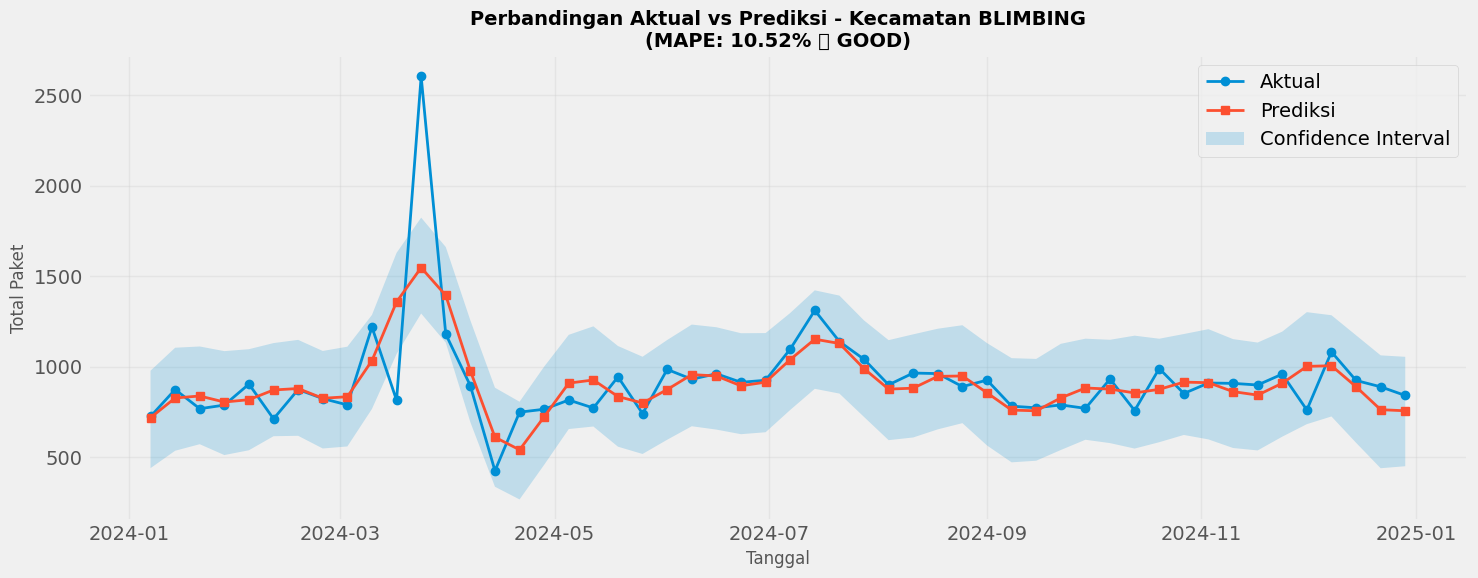


📍 Memproses Kecamatan: KEDUNGKANDANG
⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'n_changepoints': 25}


00:00:51 - cmdstanpy - INFO - Chain [1] start processing
00:00:51 - cmdstanpy - INFO - Chain [1] done processing
00:00:51 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 9.09% 🟢 EXCELLENT
   MAE: 63.96
   RMSE: 94.40
   MSE: 8912.06


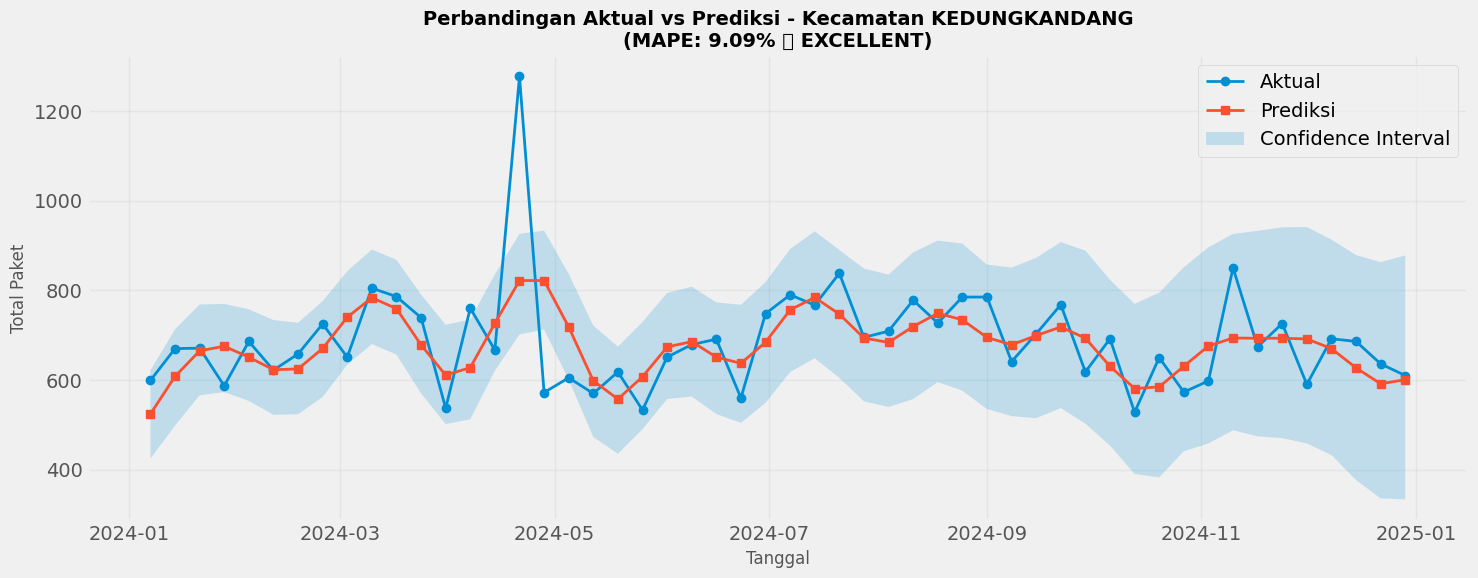


📍 Memproses Kecamatan: KLOJEN
⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 50}


00:00:52 - cmdstanpy - INFO - Chain [1] start processing
00:00:52 - cmdstanpy - INFO - Chain [1] done processing
00:00:52 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:00:52 - cmdstanpy - INFO - Chain [1] done processing
00:00:52 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:00:52 - cmdstanpy - INFO - Chain [1] start processing
00:00:52 - cmdstanpy - INFO - Chain [1] start processing
00:00:56 - cmdstanpy - INFO - Chain [1] done processing
00:00:56 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 8.63% 🟢 EXCELLENT
   MAE: 173.98
   RMSE: 215.06
   MSE: 46249.61


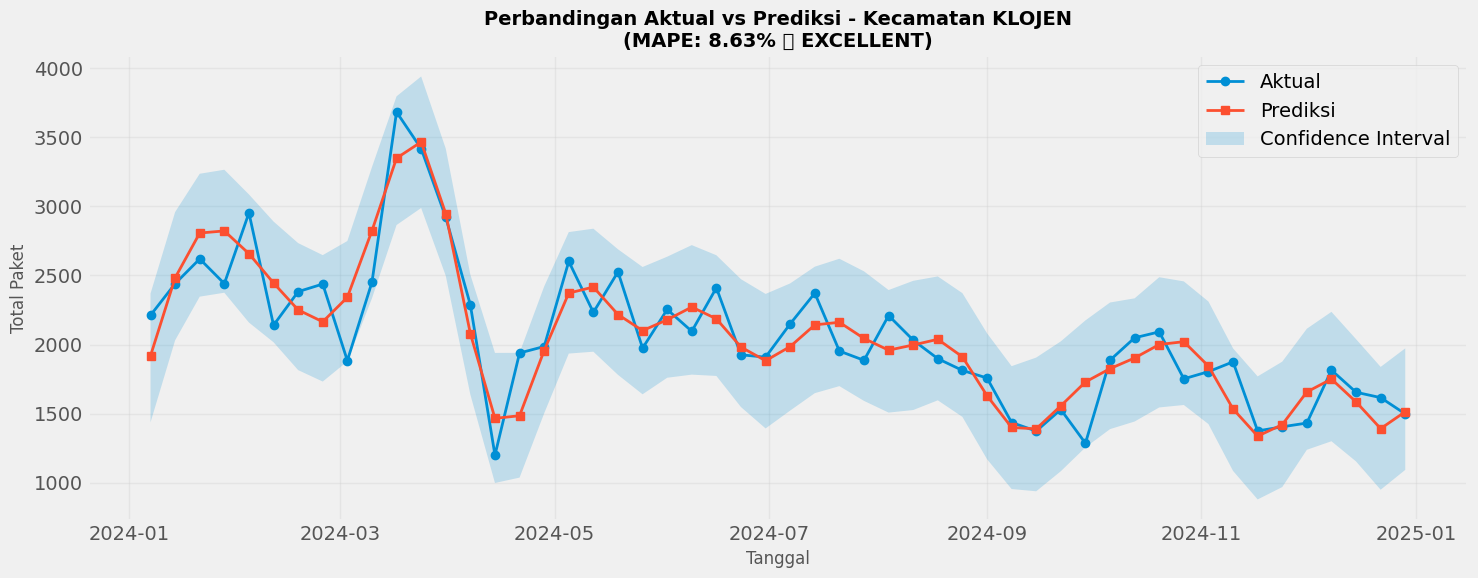


📍 Memproses Kecamatan: LOWOKWARU
⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.8, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'n_changepoints': 100}


00:00:57 - cmdstanpy - INFO - Chain [1] start processing
00:00:57 - cmdstanpy - INFO - Chain [1] done processing
00:00:57 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 8.59% 🟢 EXCELLENT
   MAE: 98.60
   RMSE: 125.11
   MSE: 15651.78


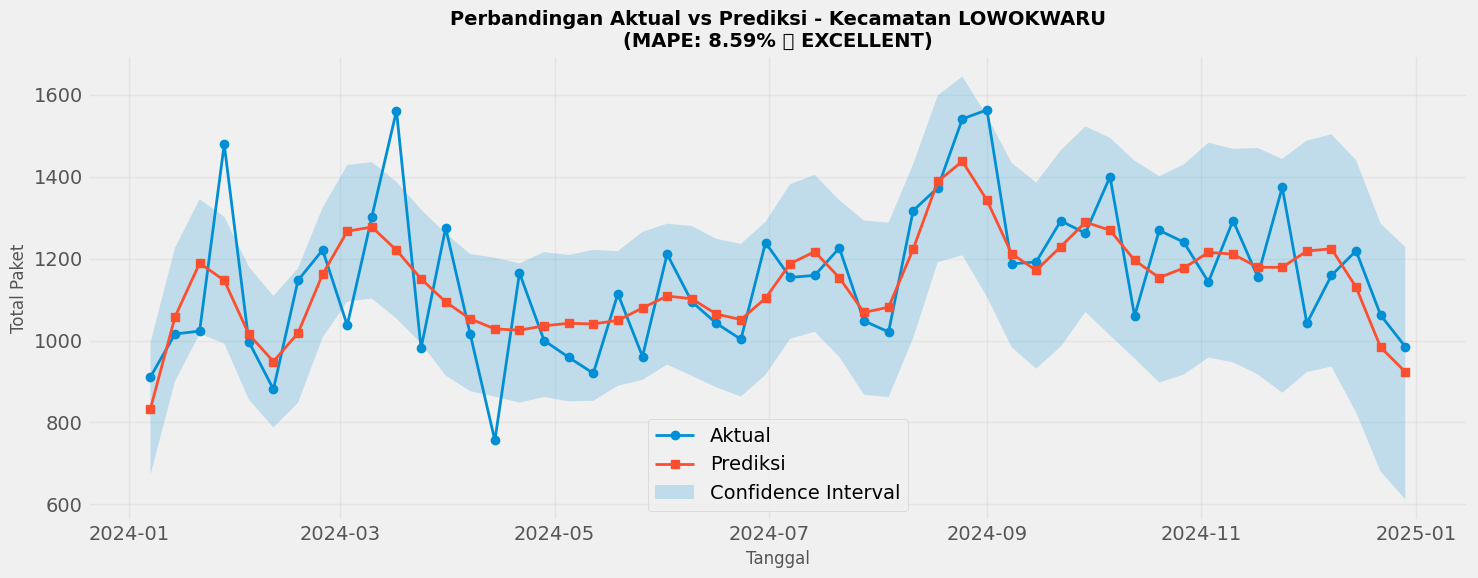


📍 Memproses Kecamatan: SUKUN
⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'n_changepoints': 100}


00:00:58 - cmdstanpy - INFO - Chain [1] start processing
00:00:58 - cmdstanpy - INFO - Chain [1] done processing
00:00:58 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 12.41% 🟡 GOOD
   MAE: 142.03
   RMSE: 474.83
   MSE: 225464.64


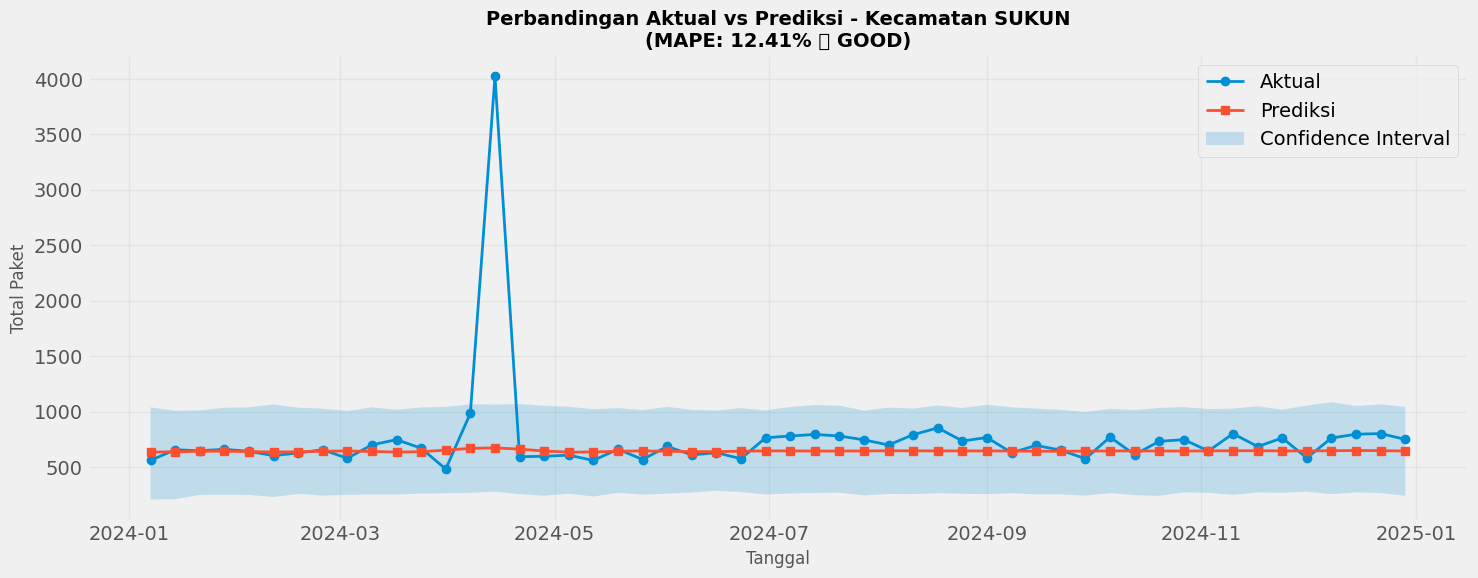


🏆 RINGKASAN HASIL PREDIKSI - SEMUA KECAMATAN

                         MSE         MAE       MAPE        RMSE       Status
BLIMBING        35917.727942  102.194549  10.524171   189.51973       🟡 GOOD
KEDUNGKANDANG    8912.059768   63.962242   9.092261   94.403706  🟢 EXCELLENT
KLOJEN          46249.612744  173.976107   8.633167  215.057231  🟢 EXCELLENT
LOWOKWARU       15651.779944   98.600029   8.592174  125.107074  🟢 EXCELLENT
SUKUN          225464.636936   142.02765  12.409549  474.831167       🟡 GOOD

🎯 Rata-rata MAPE: 9.85%
✅ Prediksi untuk semua kecamatan selesai!


In [23]:
# Prediksi menggunakan Prophet untuk setiap kecamatan
print("🚀 Memulai prediksi dengan Prophet untuk setiap kecamatan...")

# Dictionary untuk menyimpan hasil
predictions_results = {}

# Buat holidays untuk Indonesia
holidays = make_holidays_df(
    year_list=[2021, 2022, 2023, 2024, 2025],
    country='ID'
)

for kecamatan in unique_kecamatan:
    print(f"\n{'='*60}")
    print(f"📍 Memproses Kecamatan: {kecamatan}")
    print(f"{'='*60}")
    
    # Filter data untuk kecamatan saat ini
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan].copy()
    
    # Split data
    split_point_kecamatan = len(df_filtered_kecamatan) - 52
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan].copy()
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:].copy()
    
    # Prepare data untuk Prophet (format: ds, y)
    train_prophet = train_kecamatan[['Tgl_Kirim', 'total paket']].copy()
    train_prophet.columns = ['ds', 'y']
    
    # Gunakan hyperparameter optimal jika tersedia
    params = optimal_params.get(kecamatan, {
        'changepoint_prior_scale': 0.5,
        'seasonality_prior_scale': 1.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 25
    })
    
    # Inisialisasi dan training model Prophet
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        holidays=holidays,
        **params
    )
    
    print(f"⚙️  Training model dengan hyperparameter: {params}")
    model.fit(train_prophet)
    
    # Buat prediksi untuk periode test (52 minggu)
    future = model.make_future_dataframe(periods=52, freq='W')
    forecast = model.predict(future)
    
    # Ambil prediksi untuk periode test
    test_predictions = forecast.tail(52)
    
    # Hitung metrik evaluasi
    y_true = test_kecamatan['total paket'].values
    y_pred = test_predictions['yhat'].values
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = np.sqrt(mse)
    
    # Status berdasarkan MAPE
    if mape < 10:
        status = "🟢 EXCELLENT"
    elif mape < 20:
        status = "🟡 GOOD"
    elif mape < 50:
        status = "🟠 REASONABLE"
    else:
        status = "🔴 POOR"
    
    # Simpan hasil
    predictions_results[kecamatan] = {
        'train': train_kecamatan,
        'test': test_kecamatan,
        'forecast': forecast,
        'test_predictions': test_predictions,
        'model': model,
        'metrics': {
            'MSE': mse,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse,
            'Status': status
        }
    }
    
    # Tampilkan metrik
    print(f"\n📊 Metrik Evaluasi:")
    print(f"   MAPE: {mape:.2f}% {status}")
    print(f"   MAE: {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MSE: {mse:.2f}")
    
    # Visualisasi perbandingan Aktual vs Prediksi
    plt.figure(figsize=(15, 6))
    plt.plot(test_kecamatan['Tgl_Kirim'], test_kecamatan['total paket'], 
             marker='o', label='Aktual', linewidth=2, markersize=6)
    plt.plot(test_predictions['ds'], test_predictions['yhat'], 
             marker='s', label='Prediksi', linewidth=2, markersize=6)
    plt.fill_between(test_predictions['ds'], 
                     test_predictions['yhat_lower'], 
                     test_predictions['yhat_upper'], 
                     alpha=0.2, label='Confidence Interval')
    
    plt.title(f'Perbandingan Aktual vs Prediksi - Kecamatan {kecamatan}\n(MAPE: {mape:.2f}% {status})', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Total Paket', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Summary hasil untuk semua kecamatan
print(f"\n{'='*60}")
print("🏆 RINGKASAN HASIL PREDIKSI - SEMUA KECAMATAN")
print(f"{'='*60}\n")

metrics_summary = pd.DataFrame({
    kec: res['metrics'] for kec, res in predictions_results.items()
}).T

print(metrics_summary.round(2))

avg_mape = metrics_summary['MAPE'].mean()
print(f"\n🎯 Rata-rata MAPE: {avg_mape:.2f}%")
print("✅ Prediksi untuk semua kecamatan selesai!")